# 1. EDA, FE and Support Vector Classifier Model (Wine Dataset)
# 2. EDA, FE and Support Vector Regressor Model (Grad Admission Dataset)

## Shubham Verma

**Follow me on Linkedin:** https://lnkd.in/gfPhvjMR

**Follow me on GitHub:** https://lnkd.in/gky-wyFJ

**For the code please check out my Machine Learning repository on GitHub**

### 1. EDA and FE for both dataset
1. Data Profiling
2. Statistical analysis
3. Graphical Analysis
4. Data Scaling

### 2. SVC on Wine Dataset
1. SVC Model
2. Performance metrics for above model
3. Performance improvement using GridSearchCV

### 3. SVR on Graduation Admission Dataset
1. SVR Model
2. Performance metrics for above model

**Wine Dataset:** https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

**Grad Admission Dataset:** https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv

# <span style='color:red '>1.0 Importing required libraries</span>

In [ ]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

### To save the model
import pickle

# <span style='color:red '>2.0 Support Vector Classifier for Wine Dataset</span>

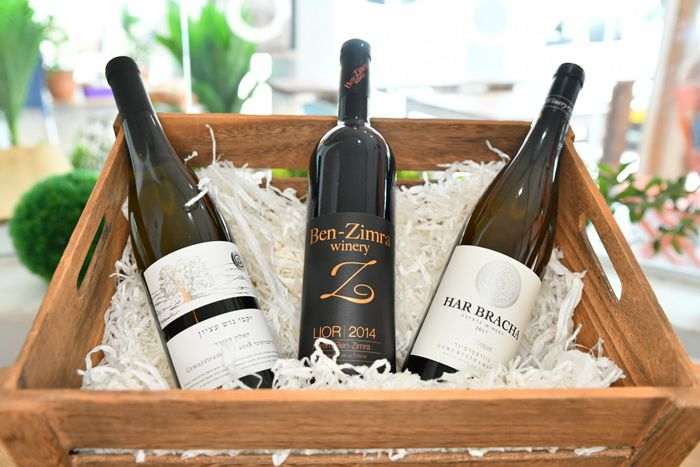

In [41]:
from IPython import display
display.Image("wine.png")

### <span style='color:red '>2.1 Importing Wine Dataset and doing statistical analysis</span>

In [4]:
### Importing wine dataset from github
dataset=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
### getting unique values for quality feature
dataset.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [42]:
### getting count of record for each unique value in quality
dataset.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
# getting null values and datatypes of all features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
### getting info about numerical features
dataset.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [43]:
### getting null values in each feature
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### <span style='color:red '>2.2 Visualising Numerical data</span>

In [46]:
### getting list of numerical features 
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print(numerical_features)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [47]:
### getting count of unique value in each feature
for feature in numerical_features:
    print("'{}' has '{}' No. of unique values".format(feature, dataset[feature].nunique()))

'fixed acidity' has '96' No. of unique values
'volatile acidity' has '143' No. of unique values
'citric acid' has '80' No. of unique values
'residual sugar' has '91' No. of unique values
'chlorides' has '153' No. of unique values
'free sulfur dioxide' has '60' No. of unique values
'total sulfur dioxide' has '144' No. of unique values
'density' has '436' No. of unique values
'pH' has '89' No. of unique values
'sulphates' has '96' No. of unique values
'alcohol' has '65' No. of unique values
'quality' has '6' No. of unique values


In [48]:
continuous_features=[feature for feature in numerical_features if dataset[feature].nunique()>6]
print(continuous_features)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


<AxesSubplot:xlabel='quality', ylabel='count'>

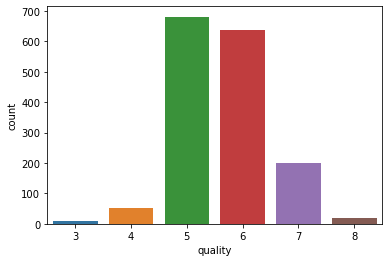

In [14]:
### visualising count of quality feature
sns.countplot(data=dataset, x='quality')

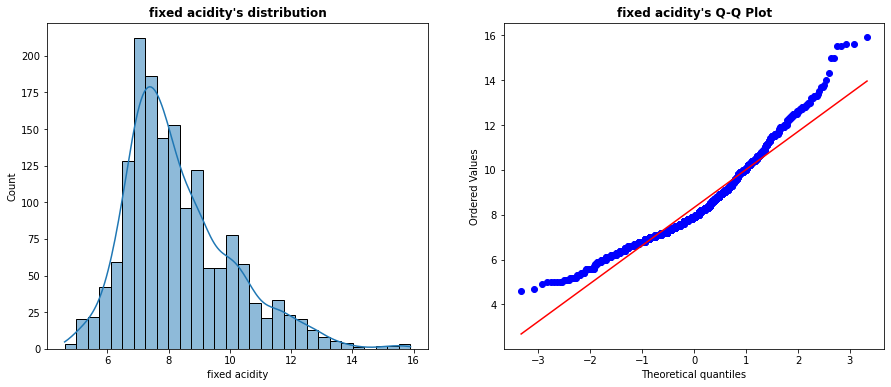

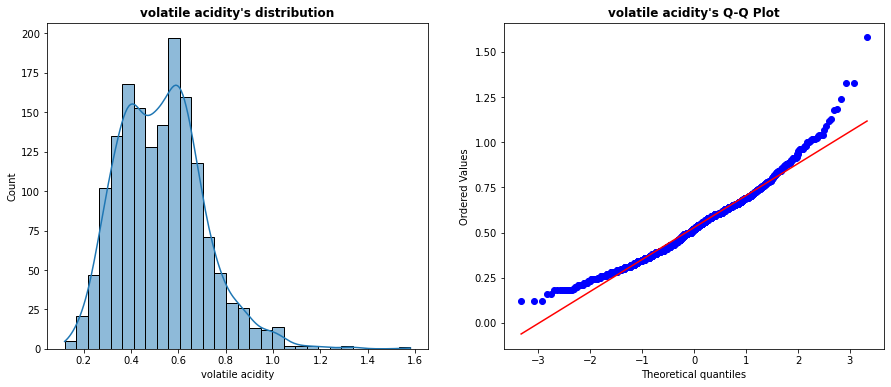

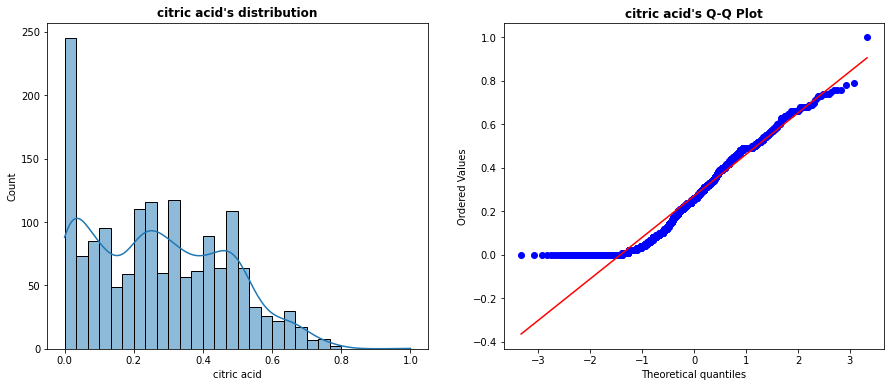

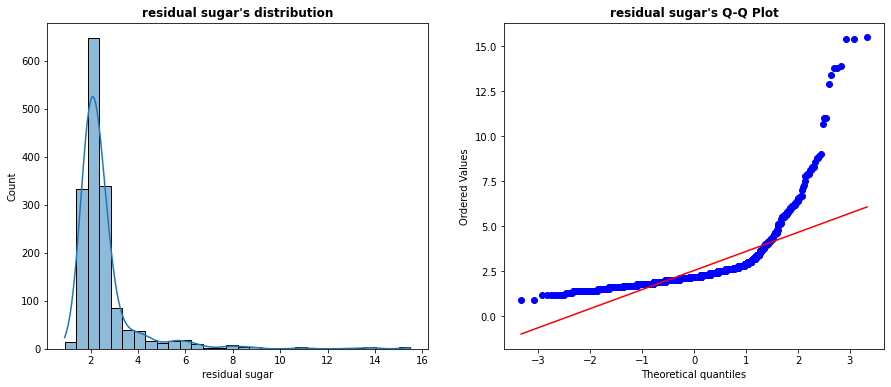

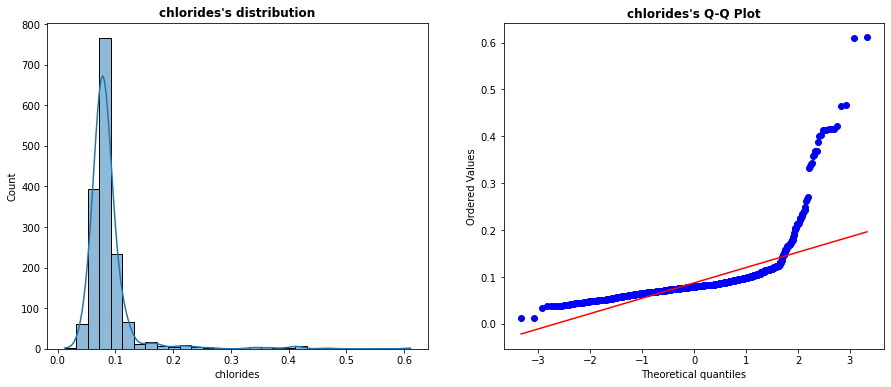

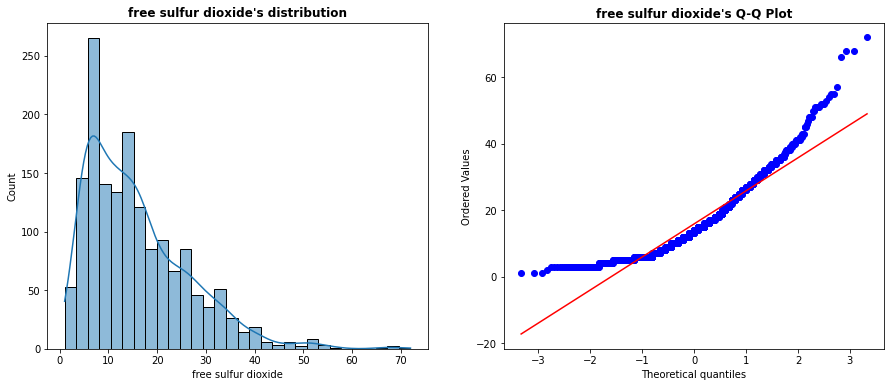

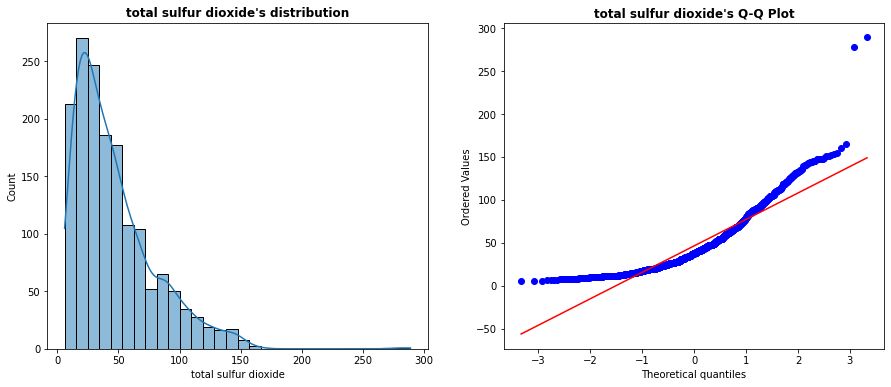

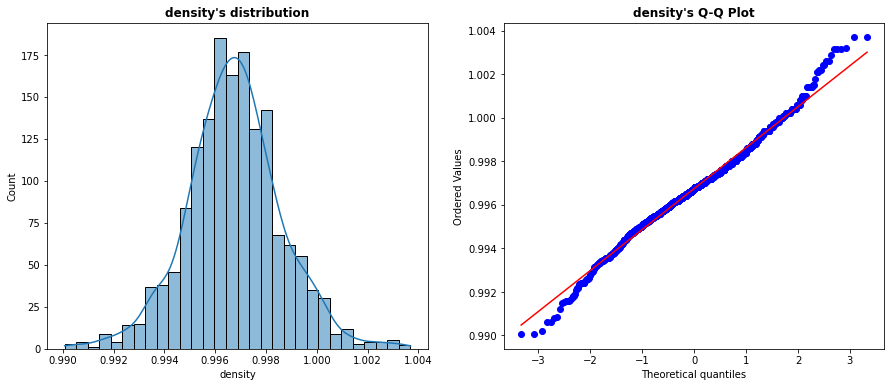

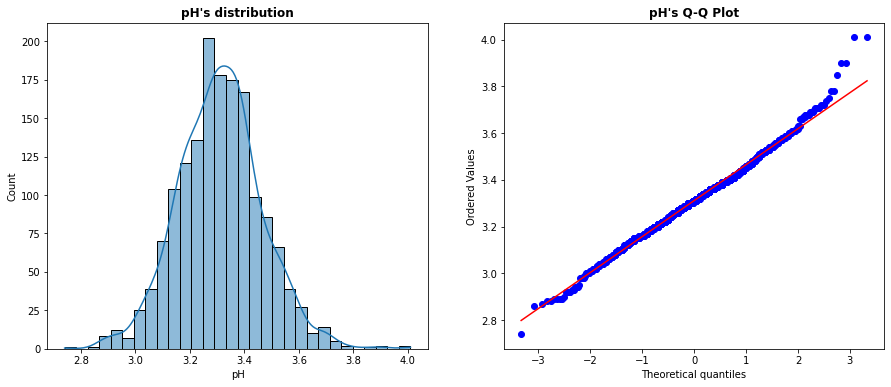

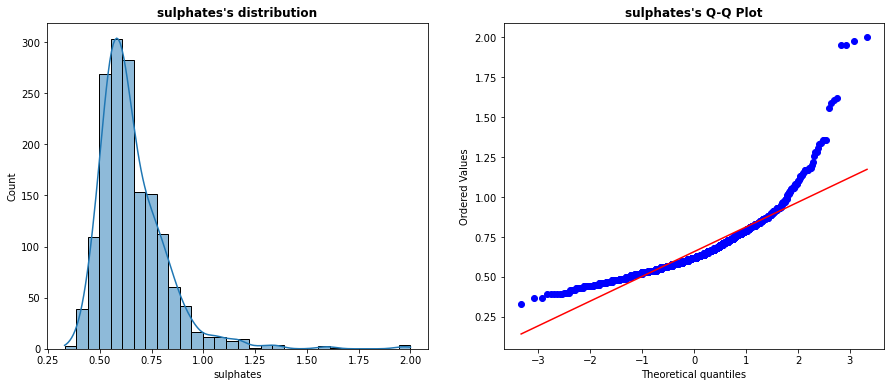

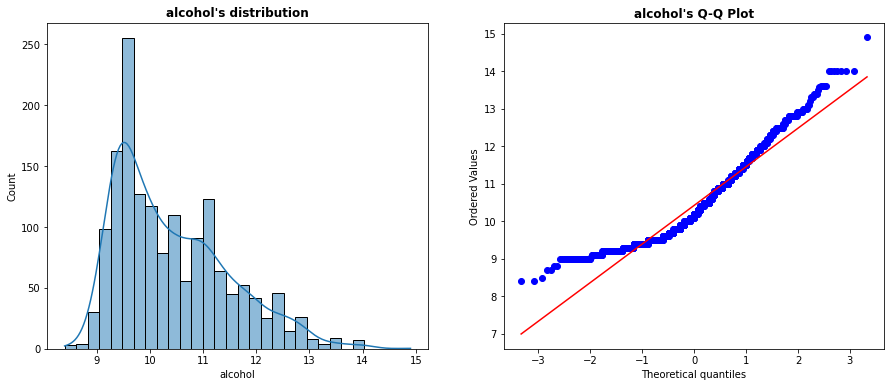

In [15]:
### Checking distribution of Continuous numerical features

for i in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=dataset, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
    plt.subplot(122)
    stats.probplot(dataset[i], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
    plt.show();

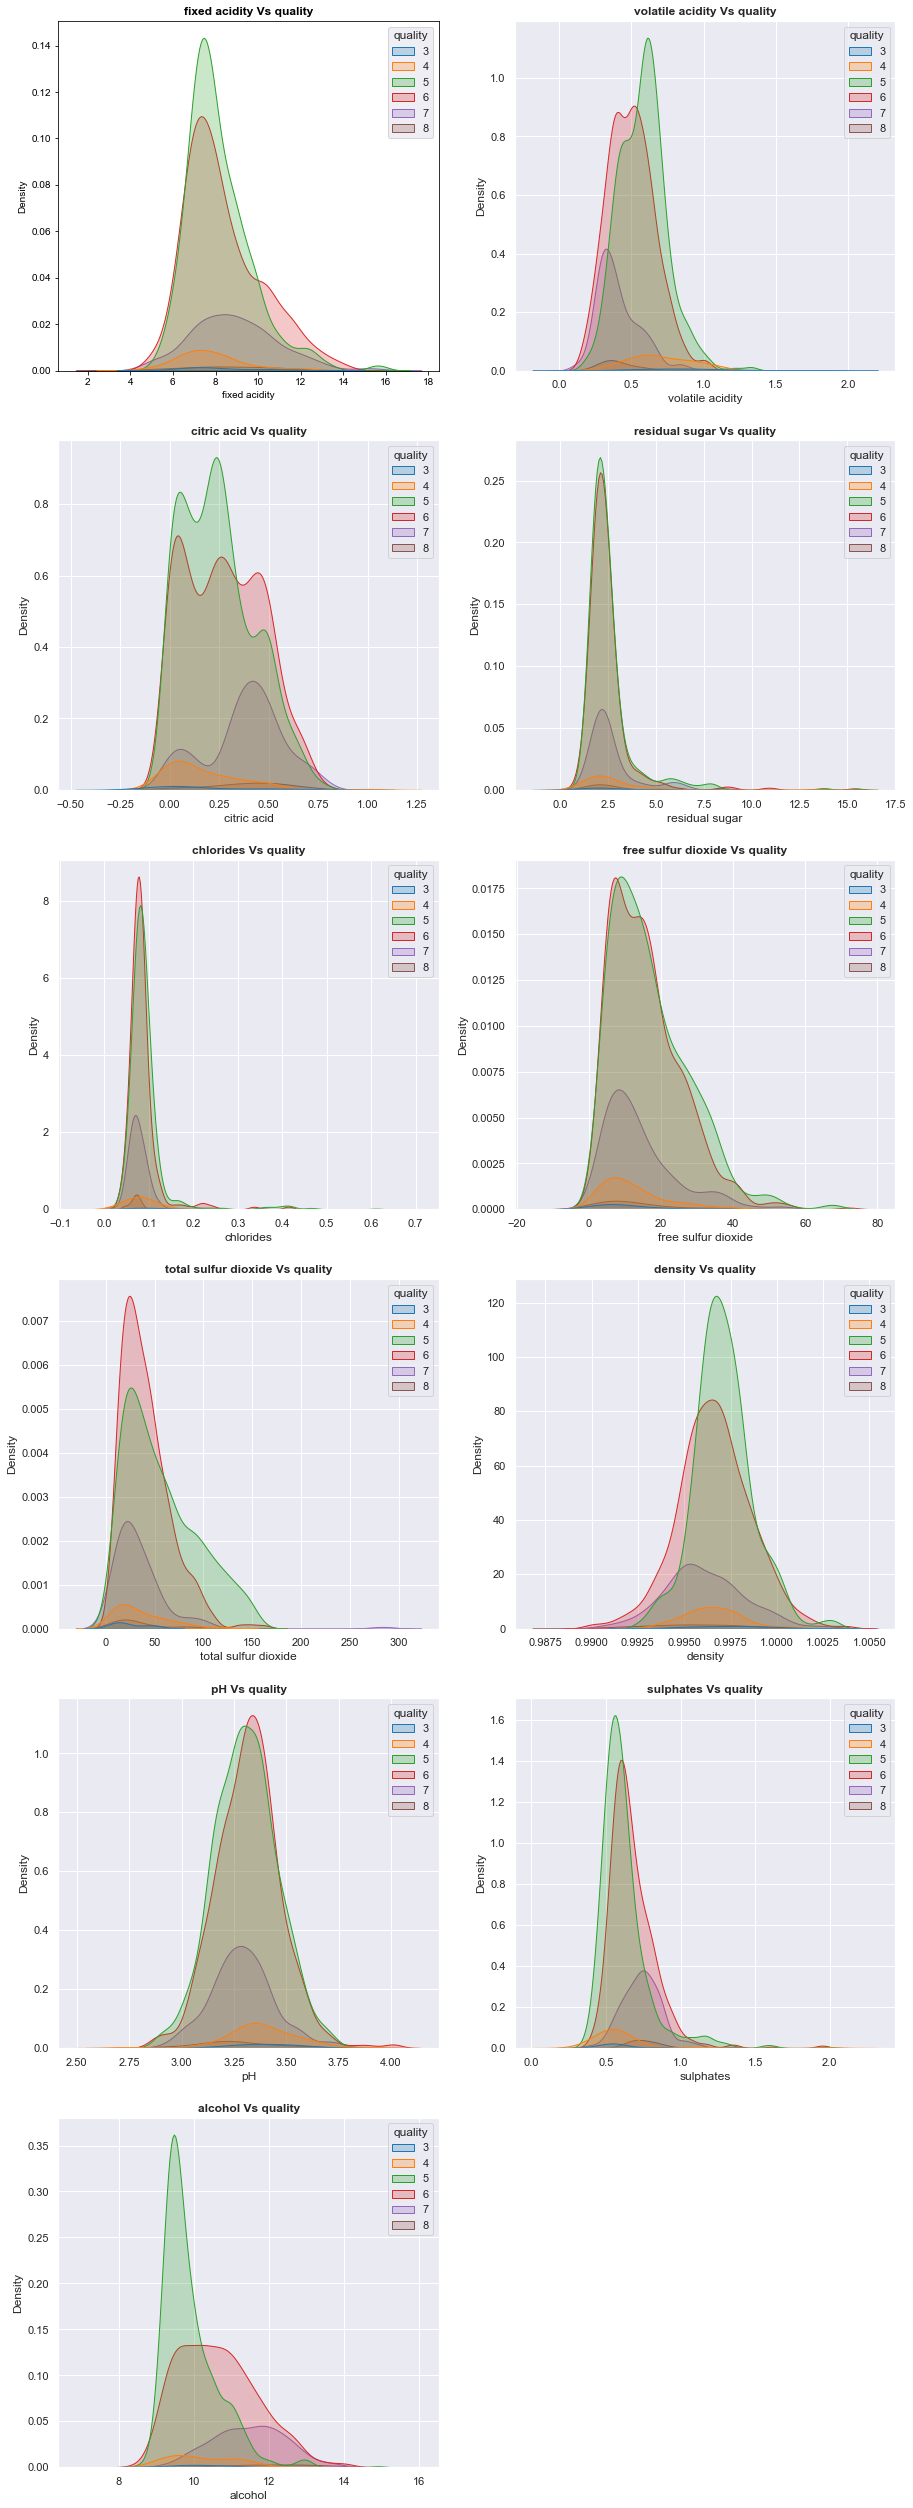

In [16]:
### Comparing Continuous numerical features with quality feature
palette1=sns.color_palette("tab10", 6)
plt.figure(figsize=(15,45))
for i in enumerate(continuous_features):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.kdeplot(data=dataset, x=i[1], hue='quality', palette=palette1, fill=True)
    plt.title("{} Vs quality".format(i[1]),fontweight="bold")

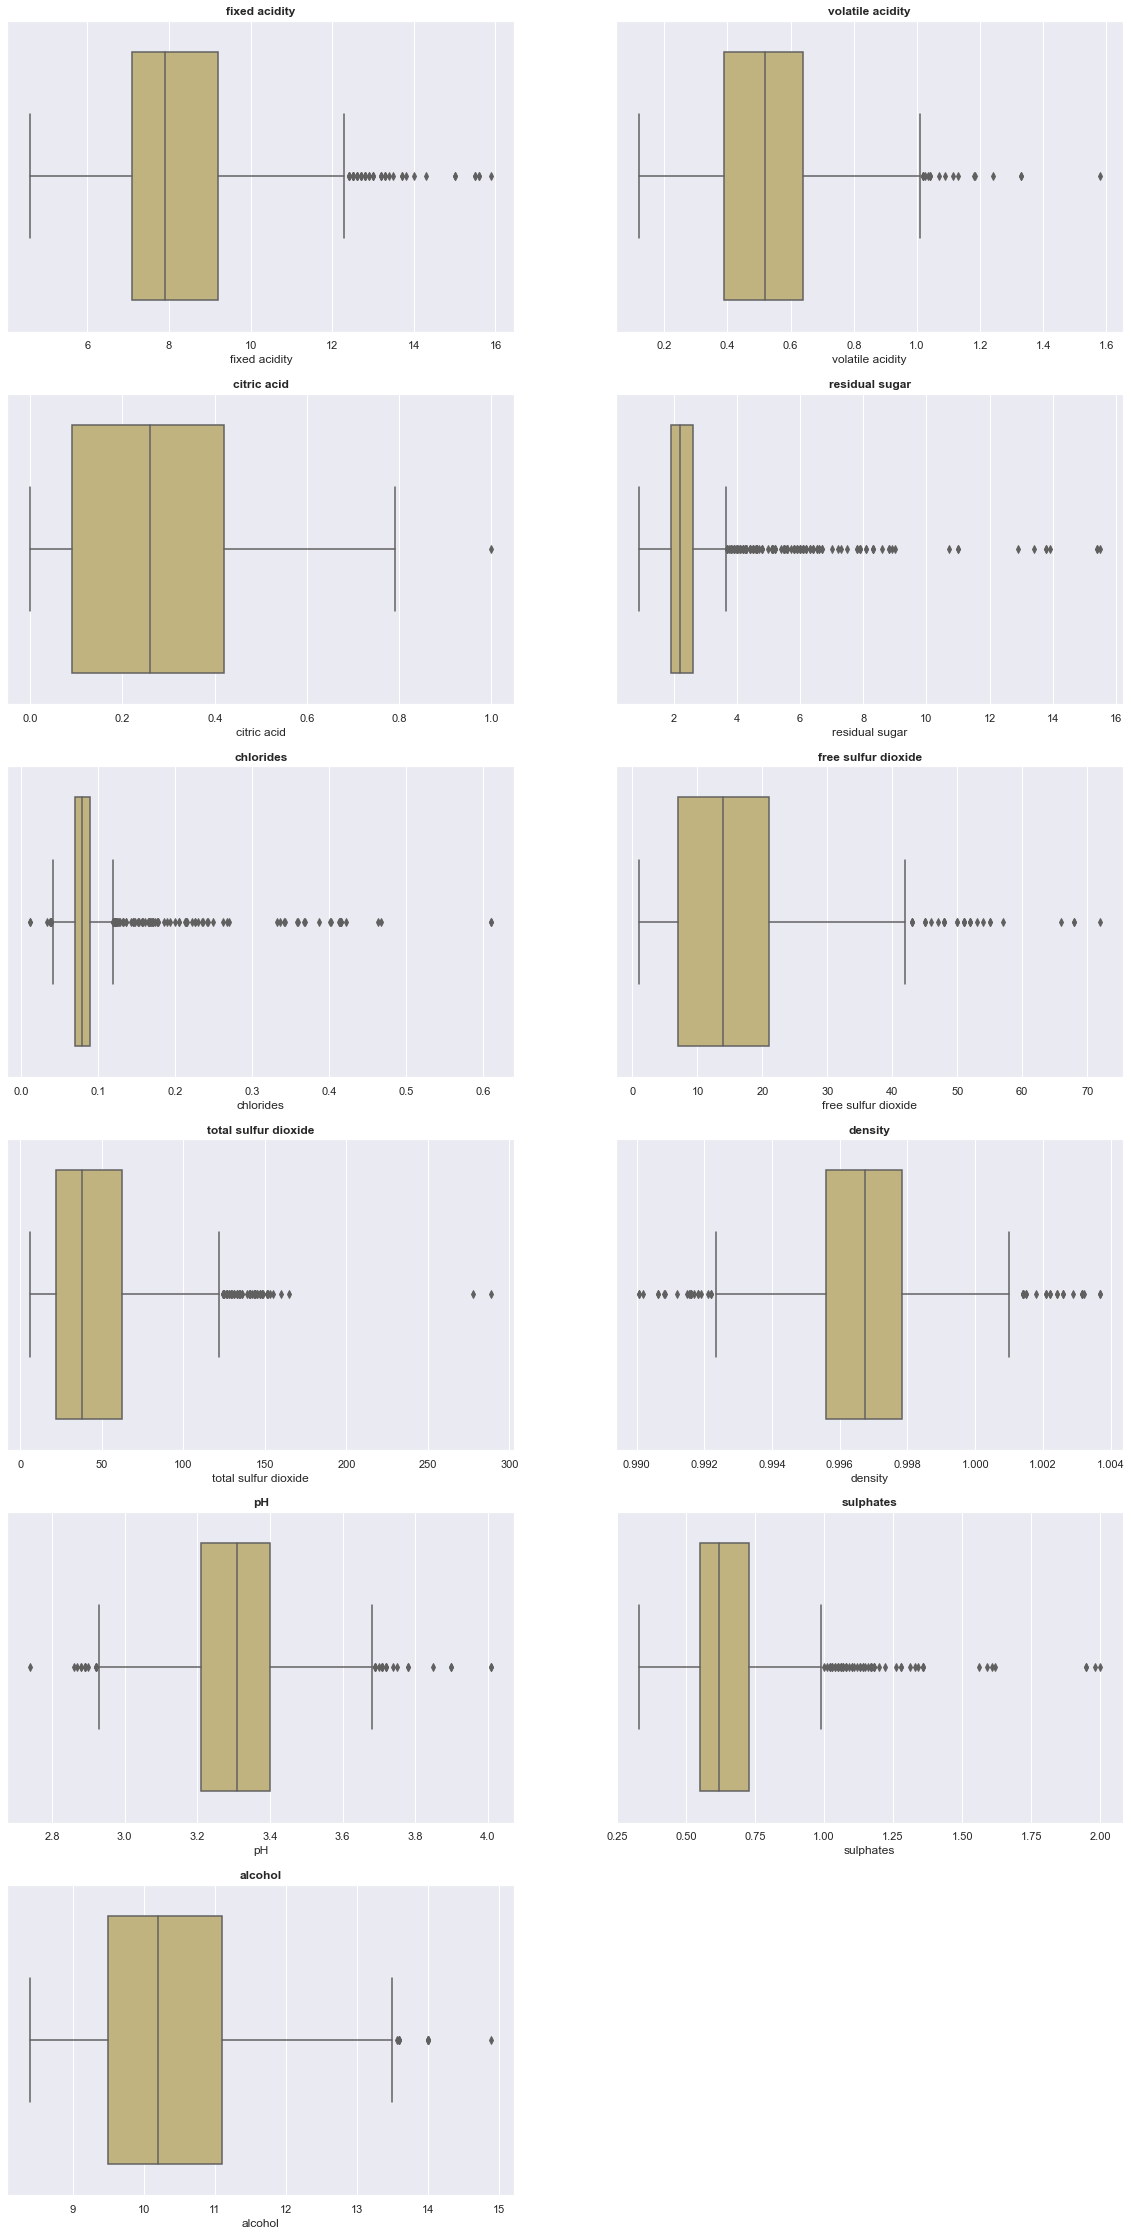

In [17]:
### Checking outliers in numerical features

plt.figure(figsize=(20,40))
for i in enumerate(continuous_features):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, x=i[1], color='y')
    plt.title("{}".format(i[1]), fontweight="bold")

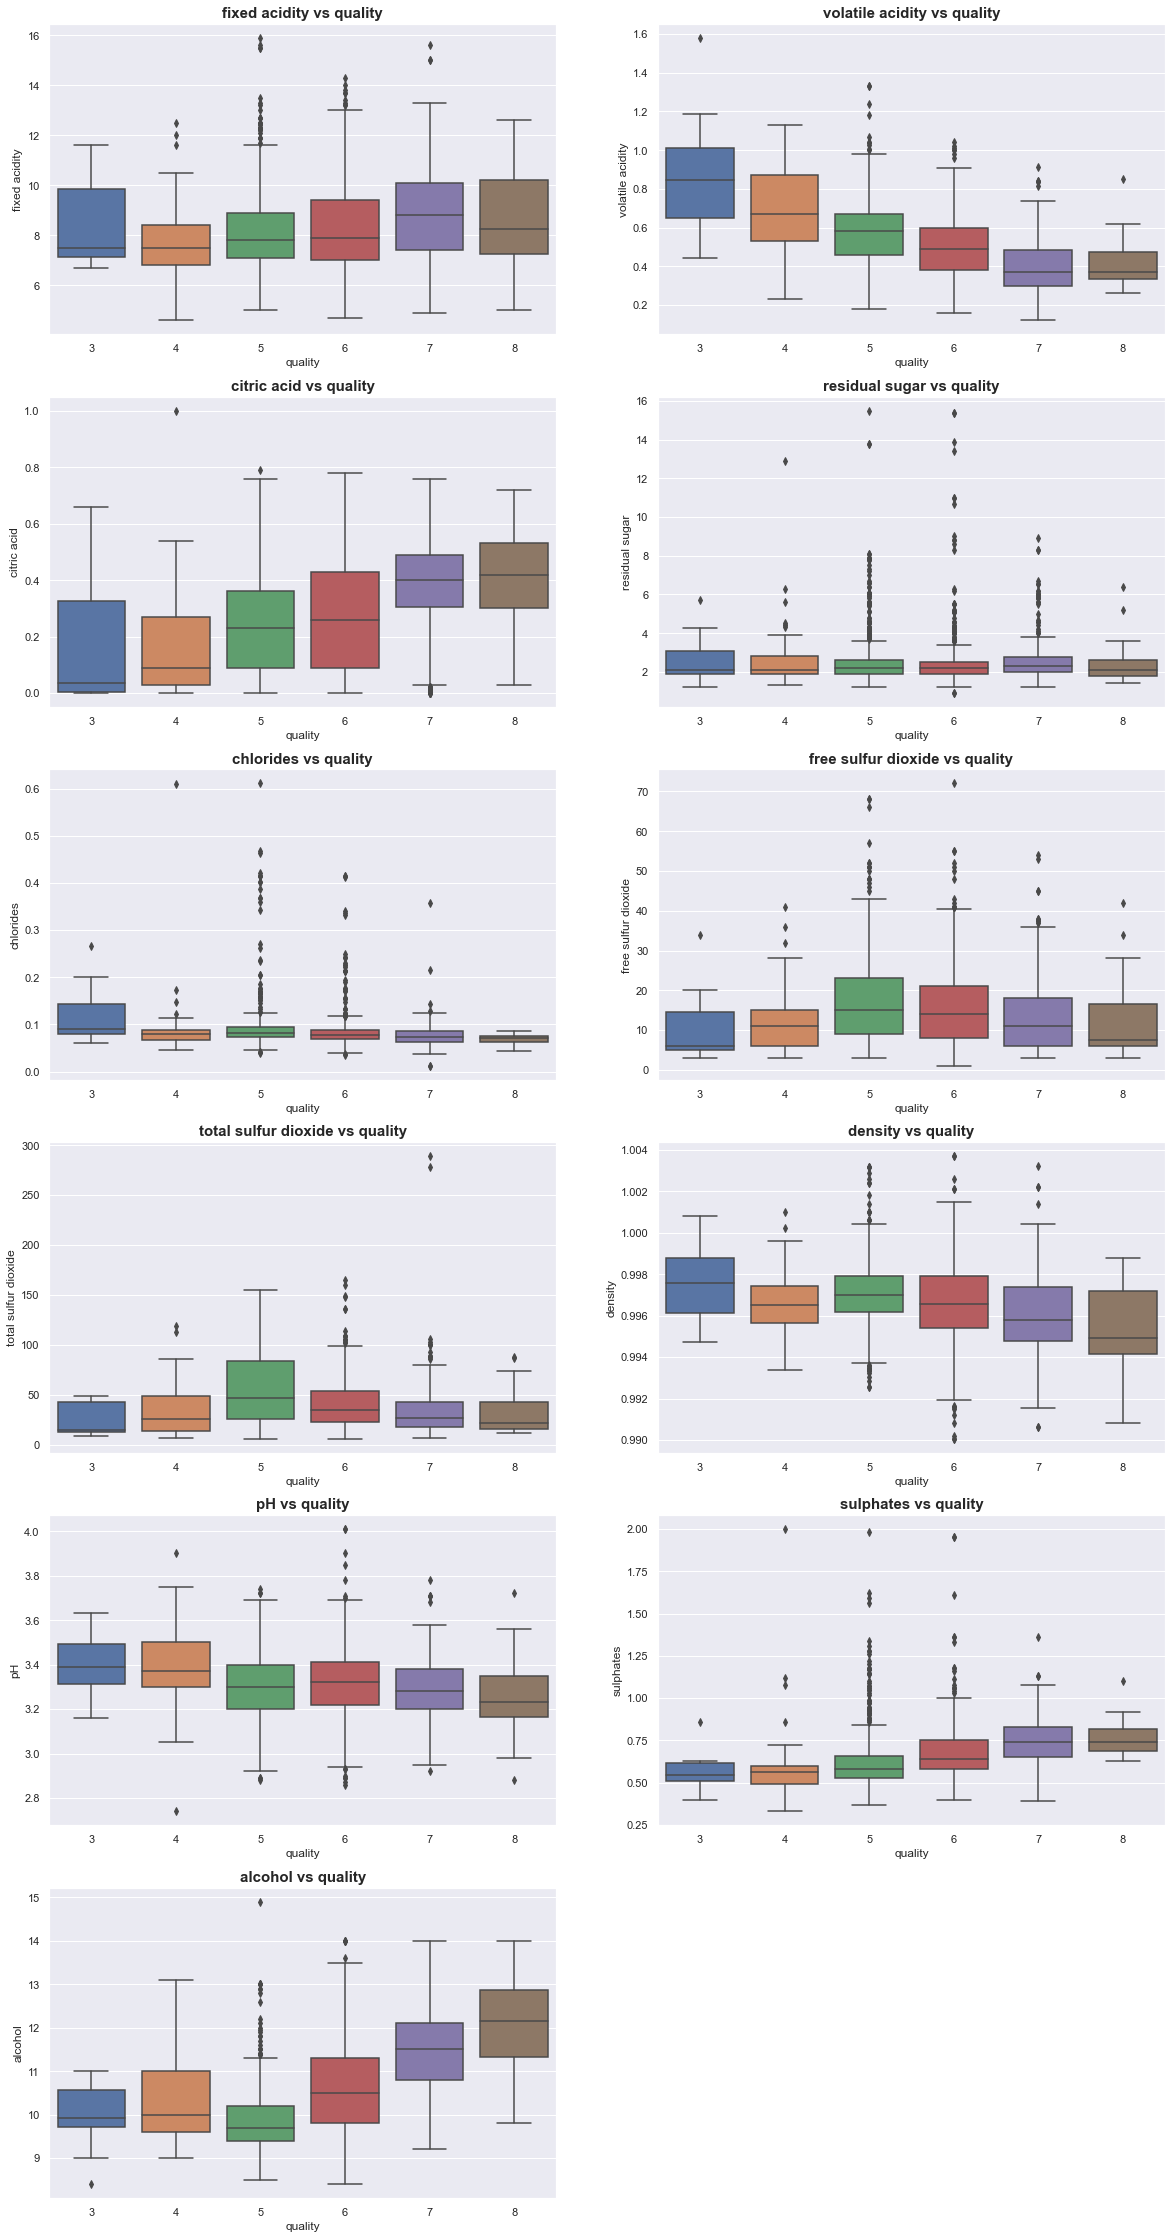

In [20]:
### getting outliers in features for each unique value in quality feature
plt.figure(figsize=(20,40))
for i in enumerate(continuous_features):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, y=i[1], x='quality')
    plt.title("{} vs quality".format(i[1]),fontsize=15, fontweight="bold")

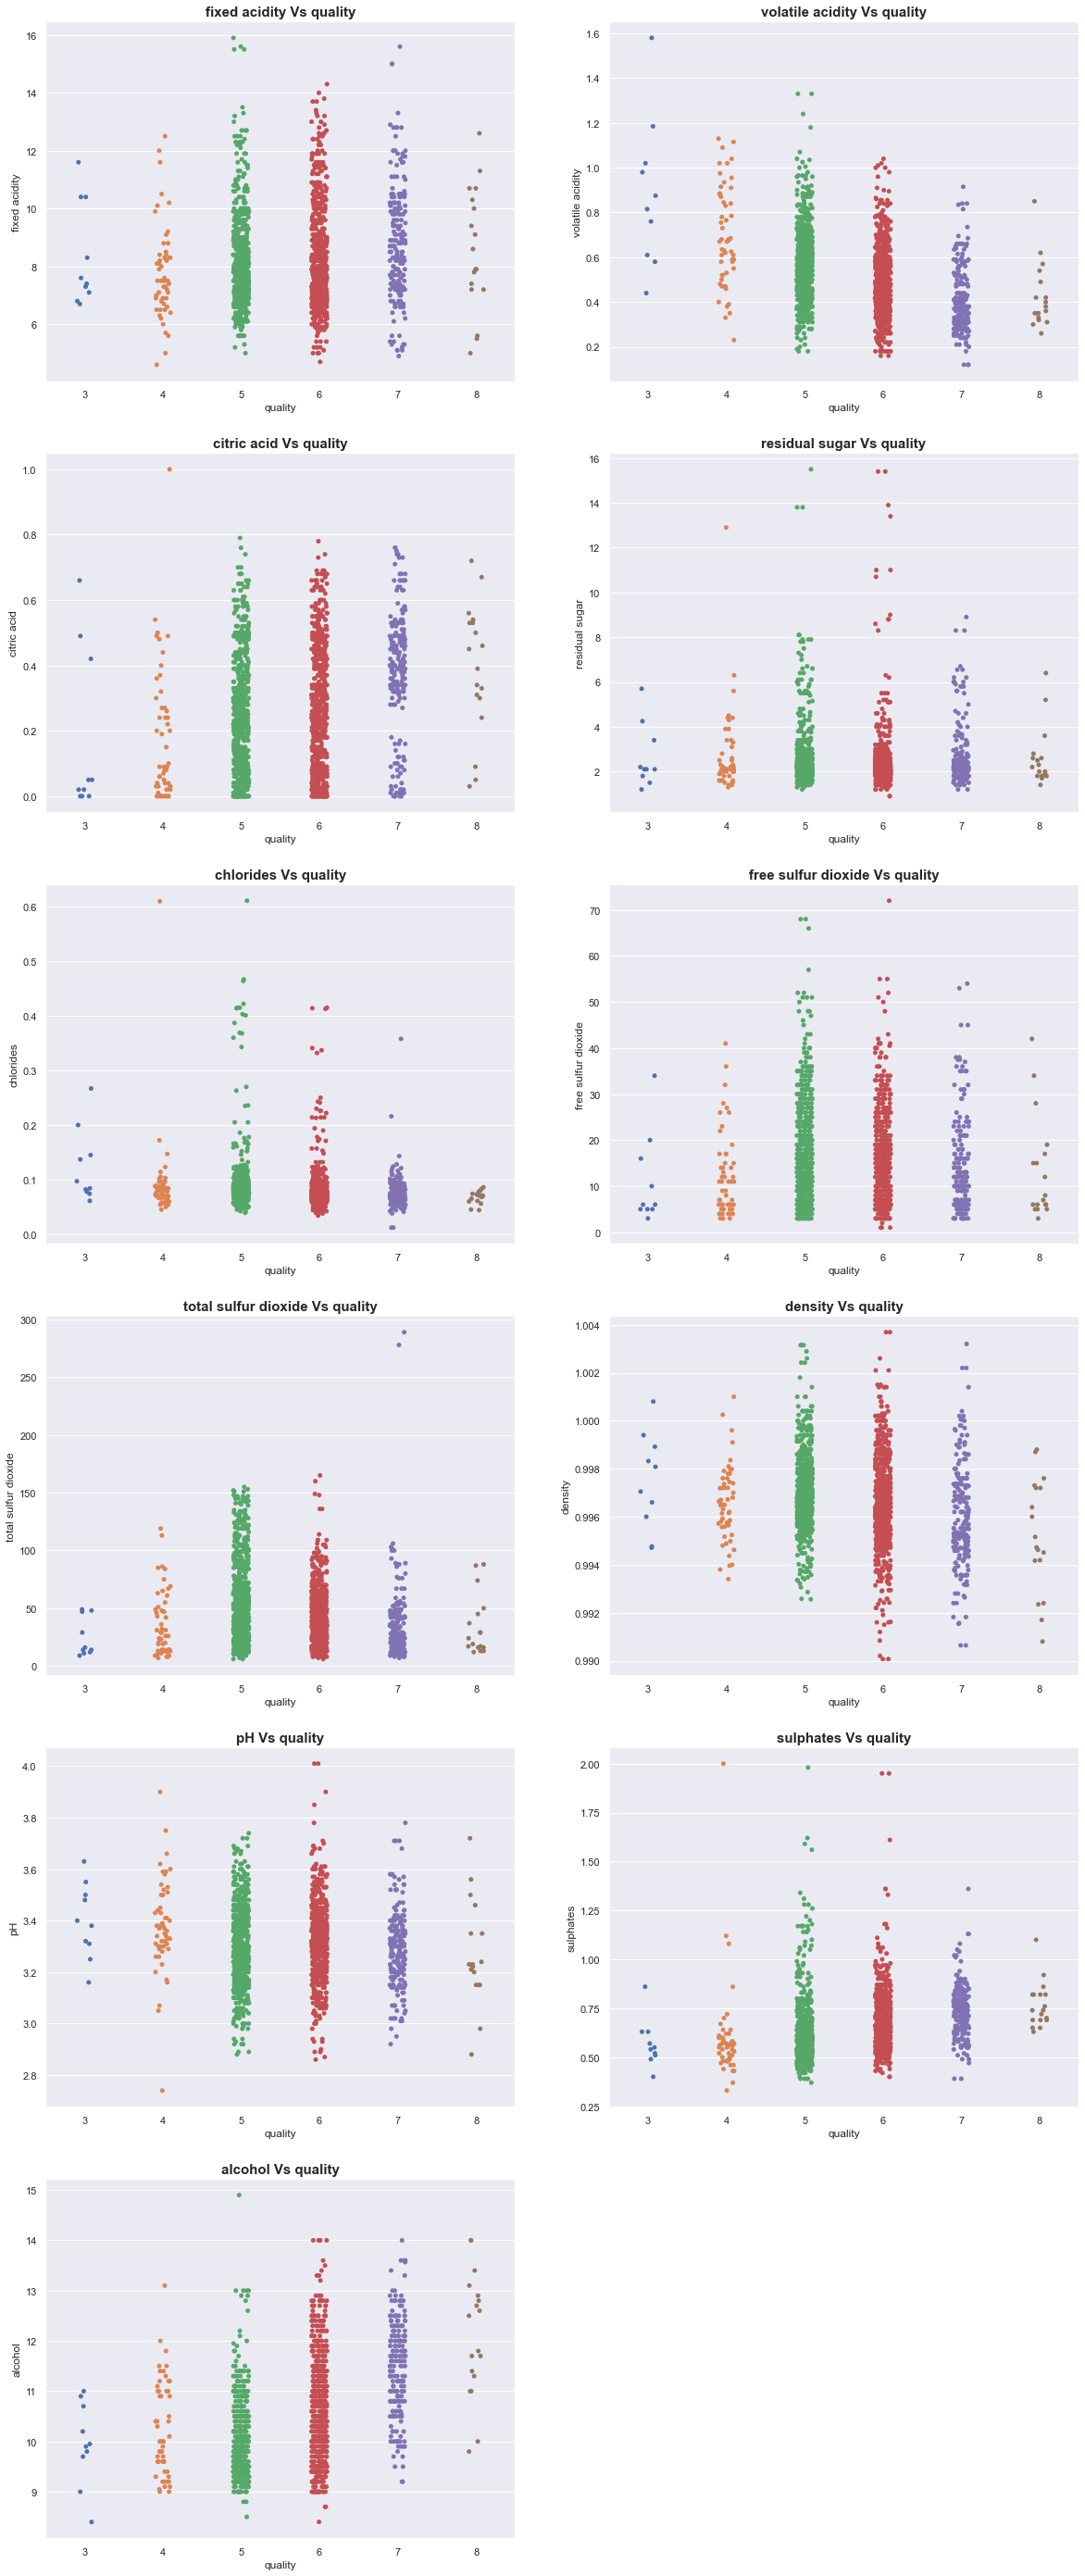

In [139]:
### visualising data scatter in each continuous feature with respect to quality
plt.figure(figsize=(20,50))
for i in enumerate(continuous_features):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,8)})
    sns.stripplot(data=dataset, y=i[1], x='quality')
    plt.title("{} Vs quality".format(i[1]),fontsize=15, fontweight="bold")

In [140]:
### getting correlation for all the features
corr=round(dataset.corr(),2)
corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.26         0.67   
volatile acidity              -0.26              1.00        -0.55   
citric acid                    0.67             -0.55         1.00   
residual sugar                 0.11              0.00         0.14   
chlorides                      0.09              0.06         0.20   
free sulfur dioxide           -0.15             -0.01        -0.06   
total sulfur dioxide          -0.11              0.08         0.04   
density                        0.67              0.02         0.36   
pH                            -0.68              0.23        -0.54   
sulphates                      0.18             -0.26         0.31   
alcohol                       -0.06             -0.20         0.11   
quality                        0.12             -0.39         0.23   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                   0.11       0.09                -0.15   
volatile acidity                0.00       0.06                -0.01   
citric acid                     0.14       0.20                -0.06   
residual sugar                  1.00       0.06                 0.19   
chlorides                       0.06       1.00                 0.01   
free sulfur dioxide             0.19       0.01                 1.00   
total sulfur dioxide            0.20       0.05                 0.67   
density                         0.36       0.20                -0.02   
pH                             -0.09      -0.27                 0.07   
sulphates                       0.01       0.37                 0.05   
alcohol                         0.04      -0.22                -0.07   
quality                         0.01      -0.13                -0.05   

                      total sulfur dioxide  density    pH  sulphates  alcohol  \
fixed acidity                        -0.11     0.67 -0.68       0.18    -0.06   
volatile acidity                      0.08     0.02  0.23      -0.26    -0.20   
citric acid                           0.04     0.36 -0.54       0.31     0.11   
residual sugar                        0.20     0.36 -0.09       0.01     0.04   
chlorides                             0.05     0.20 -0.27       0.37    -0.22   
free sulfur dioxide                   0.67    -0.02  0.07       0.05    -0.07   
total sulfur dioxide                  1.00     0.07 -0.07       0.04    -0.21   
density                               0.07     1.00 -0.34       0.15    -0.50   
pH                                   -0.07    -0.34  1.00      -0.20     0.21   
sulphates                             0.04     0.15 -0.20       1.00     0.09   
alcohol                              -0.21    -0.50  0.21       0.09     1.00   
quality                              -0.19    -0.17 -0.06       0.25     0.48   

                      quality  
fixed acidity            0.12  
volatile acidity        -0.39  
citric acid              0.23  
residual sugar           0.01  
chlorides               -0.13  
free sulfur dioxide     -0.05  
total sulfur dioxide    -0.19  
density                 -0.17  
pH                      -0.06  
sulphates                0.25  
alcohol                  0.48  
quality                  1.00

<AxesSubplot:>

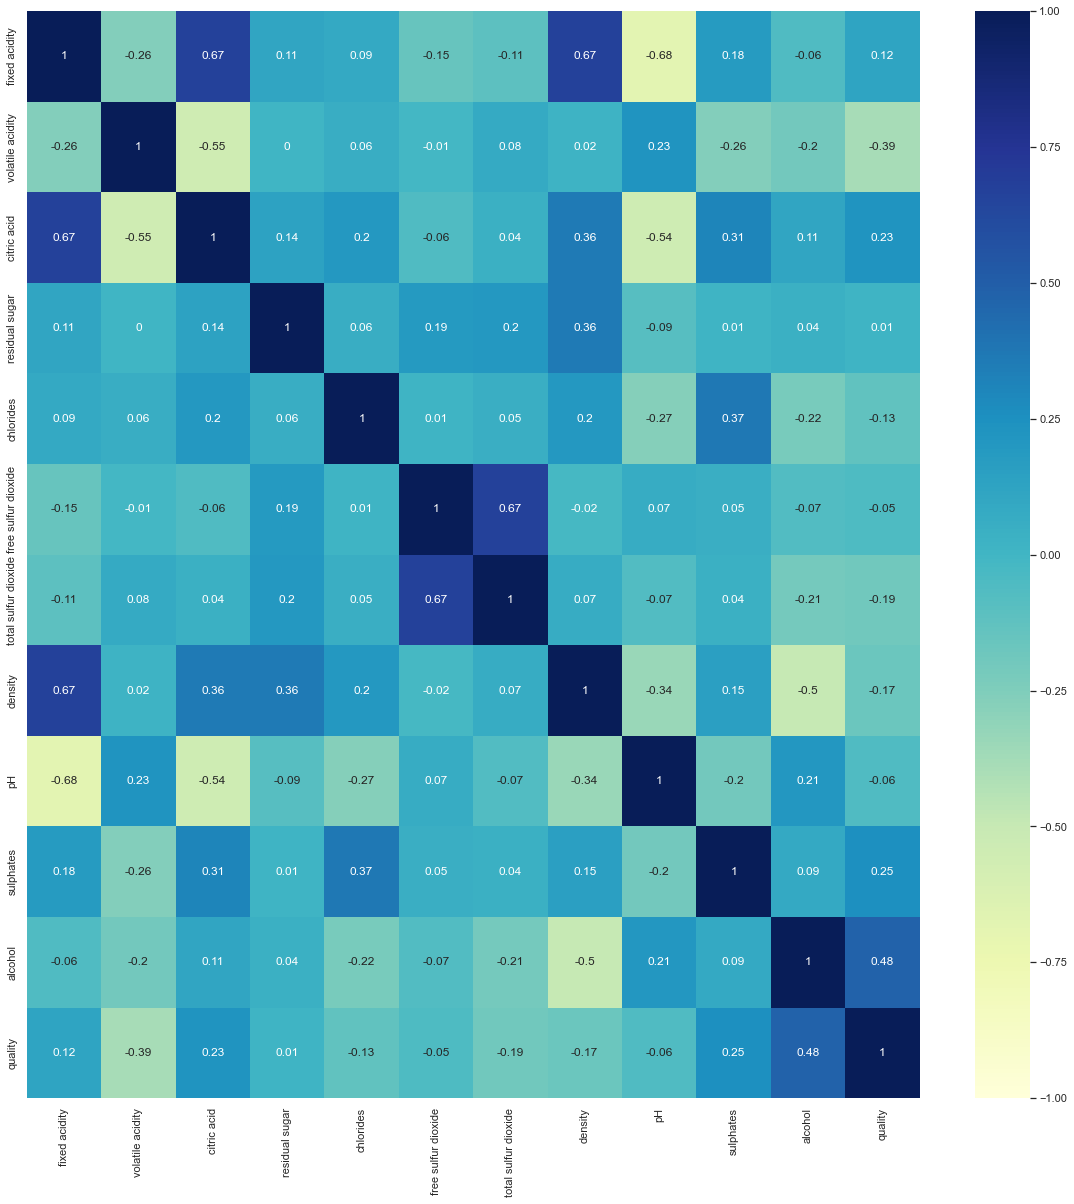

In [141]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(data=corr, annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

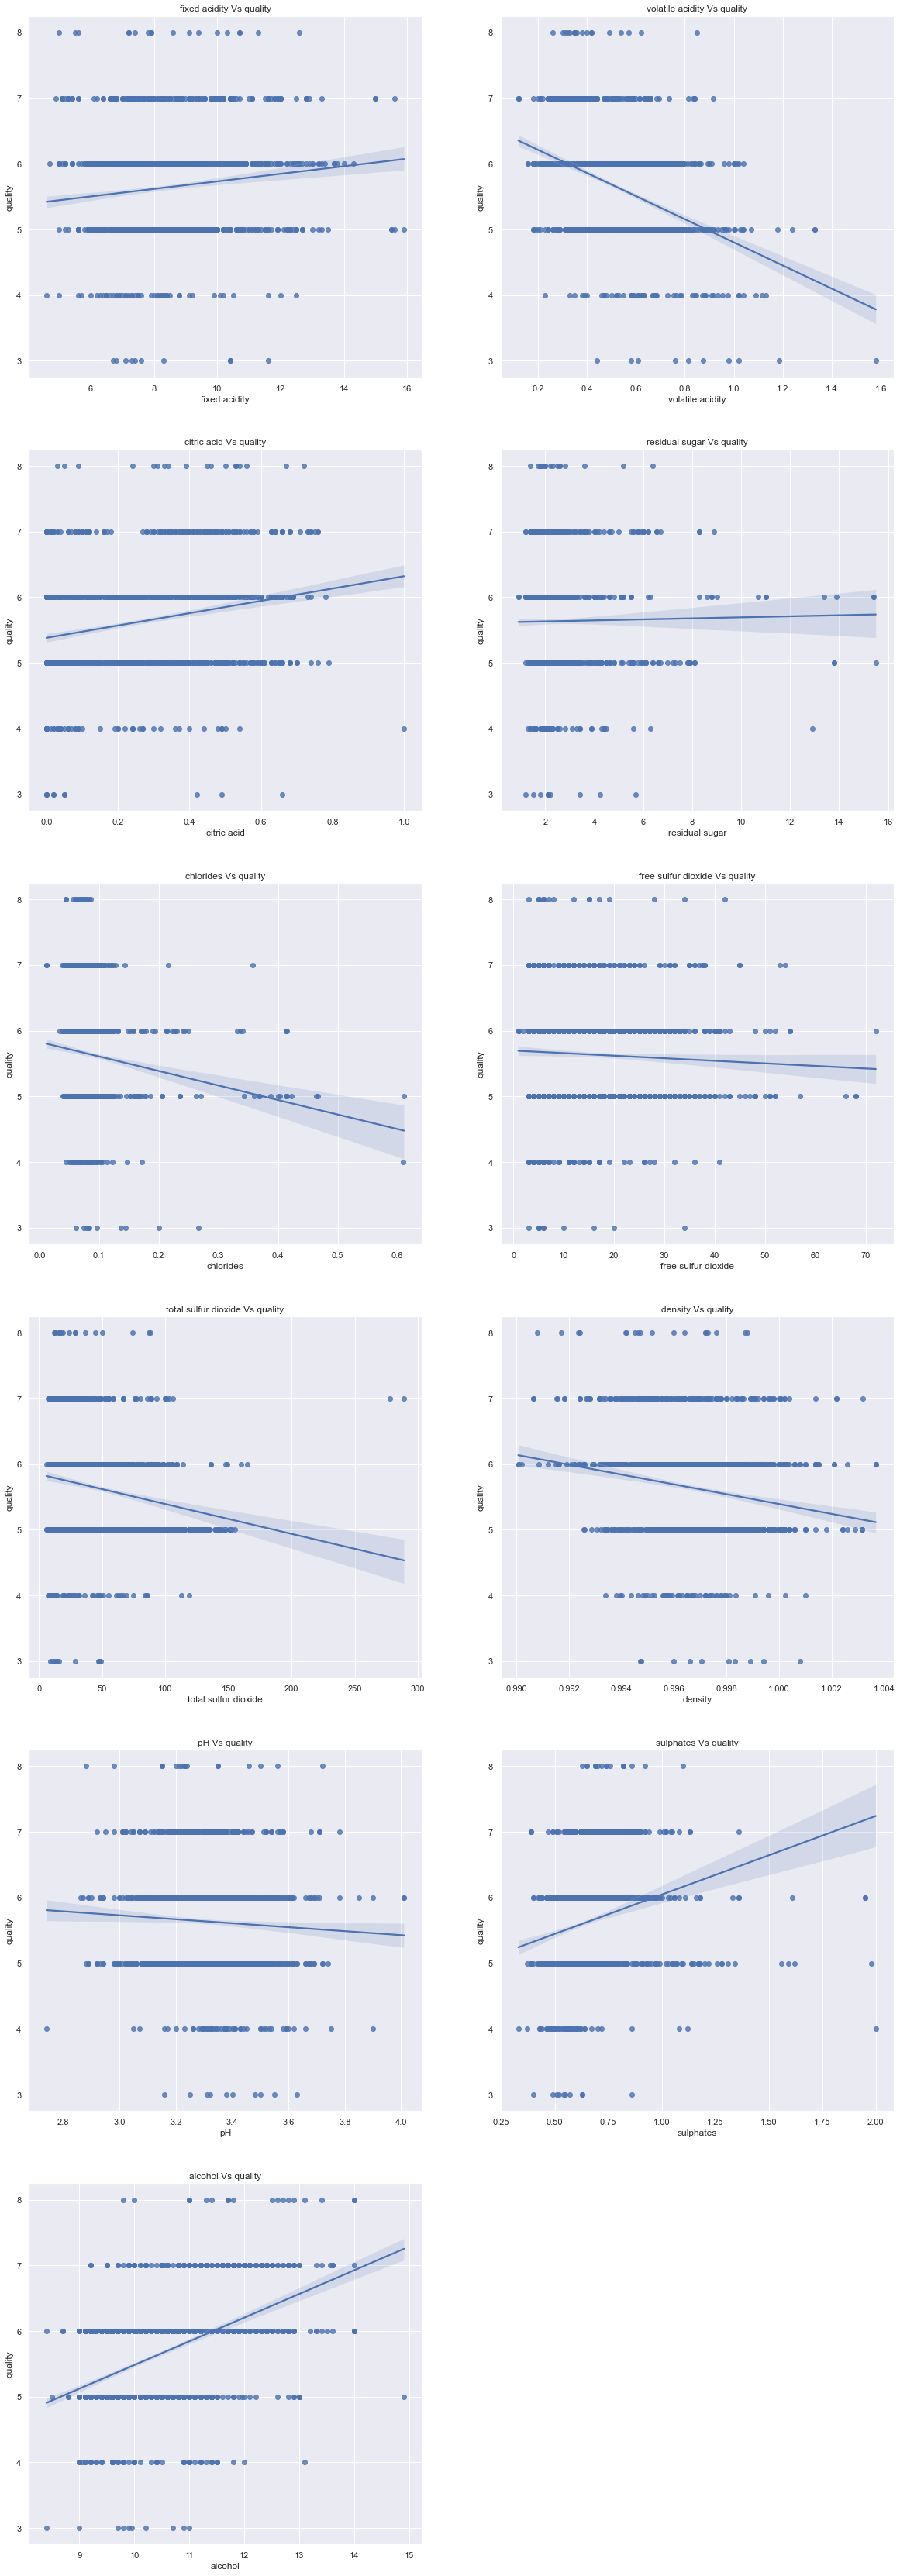

In [143]:
### plotting regplot for features vs quality
plt.figure(figsize=(20,60))
for i in enumerate(continuous_features):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(data=dataset, x=i[1], y='quality')
    plt.xlabel(i[1])
    plt.ylabel("quality")
    plt.title("{} Vs quality".format(i[1]))

### <span style='color:red '>2.3 Splitting data into independent and dependent features</span>

In [144]:
### splitting data into independent dataframe and dependent series
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [145]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [146]:
### random state train test split will be same with all people using random_state=10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [147]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
739            9.0              0.69         0.00             2.4      0.088   
663           10.1              0.28         0.46             1.8      0.050   
981            9.5              0.86         0.26             1.9      0.079   
463            8.1              0.66         0.70             2.2      0.098   
78             6.7              0.75         0.12             2.0      0.086   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
739                 19.0                  38.0  0.99900  3.35       0.60   
663                  5.0                  13.0  0.99740  3.04       0.79   
981                 13.0                  28.0  0.99712  3.25       0.62   
463                 25.0                 129.0  0.99720  3.08       0.53   
78                  12.0                  80.0  0.99580  3.38       0.52   

     alcohol  
739      9.3  
663     10.2  
981     10.0  
463      9.0  
78      10.1

In [148]:
y_train.head()

739    5
663    6
981    5
463    5
78     5
Name: quality, dtype: int64

In [149]:
X_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1518            7.4              0.47         0.46             2.2      0.114   
1246            7.4              0.74         0.07             1.7      0.086   
544            14.3              0.31         0.74             1.8      0.075   
1343            7.5              0.51         0.02             1.7      0.084   
428             9.1              0.52         0.33             1.3      0.070   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1518                  7.0                  20.0  0.99647  3.32       0.63   
1246                 15.0                  48.0  0.99502  3.12       0.48   
544                   6.0                  15.0  1.00080  2.86       0.79   
1343                 13.0                  31.0  0.99538  3.36       0.54   
428                   9.0                  30.0  0.99780  3.24       0.60   

      alcohol  
1518     10.5  
1246     10.0  
544       8.4  
1343     10.5  
428       9.3

In [150]:
y_test.head()

1518    5
1246    5
544     6
1343    6
428     5
Name: quality, dtype: int64

In [151]:
### both will have same shape
X_train.shape, y_train.shape

((1199, 11), (1199,))

In [152]:
### both will have same shape
X_test.shape, y_test.shape

((400, 11), (400,))

### <span style='color:red '>2.4 Transforming data</span>

In [153]:
scaler=StandardScaler()
scaler

StandardScaler()

In [154]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.36628211,  0.9252263 , -1.41559084, ...,  0.2800327 ,
        -0.34099149, -1.03579592],
       [ 0.99530488, -1.38052243,  0.95277345, ..., -1.75526948,
         0.71993818, -0.17938734],
       [ 0.65220155,  1.88126845, -0.07695015, ..., -0.37651639,
        -0.22931468, -0.36970036],
       ...,
       [-0.77739563, -0.8181447 ,  1.10723199, ...,  0.54265233,
         0.60826138,  0.96249075],
       [ 0.93812099, -0.98685802,  1.00425963, ..., -0.50782621,
        -0.78769872,  1.5334298 ],
       [-0.77739563,  0.41908633,  0.12899457, ..., -0.04824185,
         2.84179753, -0.17938734]])

In [155]:
X_test=scaler.transform(X_test)
X_test

array([[-0.54866008, -0.31200473,  0.95277345, ...,  0.08306797,
        -0.17347628,  0.10608218],
       [-0.54866008,  1.20641516, -1.05518758, ..., -1.23003021,
        -1.01105233, -0.36970036],
       [ 3.39702815, -1.21180911,  2.3943865 , ..., -2.93705783,
         0.71993818, -1.89220449],
       ...,
       [-0.4914762 , -0.53695583,  0.12899457, ...,  0.87092688,
         0.32906936,  1.05764726],
       [-0.26274065, -0.14329141,  0.28345311, ..., -0.70479094,
        -0.6201835 , -0.8454829 ],
       [-0.37710842, -1.49299798, -0.07695015, ..., -1.03306548,
         0.71993818,  0.48670821]])

### <span style='color:red '>2.5 Building SVC Model, training and performance of Model</span>

In [156]:
svc=SVC()
svc

SVC()

In [157]:
svc.fit(X_train,y_train)

SVC()

In [158]:
svc_pred=svc.predict(X_test)
svc_pred

array([6, 5, 6, 6, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6,
       5, 6, 6, 6, 6, 5, 6, 7, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 5, 5,
       5, 5, 7, 6, 7, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5,
       5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 5, 7, 6, 6, 5, 5,
       6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 7, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6,
       7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6,
       6, 7, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 7, 7, 7, 6, 5, 5, 6, 5,
       5, 5, 5, 6, 6, 6, 5, 7, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 7, 5, 6, 5, 6, 6,

In [159]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report

In [160]:
confusion_mat=confusion_matrix(y_test, svc_pred)
confusion_mat

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,  12,   3,   0,   0],
       [  0,   0, 124,  47,   1,   0],
       [  0,   0,  41, 105,   6,   0],
       [  0,   0,   2,  31,  17,   0],
       [  0,   0,   0,   6,   3,   0]], dtype=int64)

In [161]:
acc=accuracy_score(y_test, svc_pred)
acc

0.615

In [162]:
report=classification_report(y_test, svc_pred, zero_division=False)
print(report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.69      0.72      0.70       172
           6       0.54      0.69      0.61       152
           7       0.63      0.34      0.44        50
           8       0.00      0.00      0.00         9

    accuracy                           0.61       400
   macro avg       0.31      0.29      0.29       400
weighted avg       0.58      0.61      0.59       400



In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [165]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [166]:
log_pred=log_reg.predict(X_test)
log_pred

array([6, 5, 5, 6, 5, 7, 6, 6, 5, 5, 6, 5, 5, 5, 5, 4, 5, 6, 5, 5, 5, 6,
       6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 7,
       5, 6, 5, 6, 7, 5, 6, 7, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5,
       6, 5, 7, 6, 7, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 7, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 5, 5,
       6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 7, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6,
       7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 7, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 3, 5, 5, 5, 5,
       6, 7, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7, 7, 6, 6, 6, 5, 6, 5,
       5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 5, 7, 6, 5, 6, 5, 6, 5, 6, 6,

In [167]:
report_log=classification_report(y_test, log_pred, zero_division=False)
print(report_log)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.66      0.66      0.66       172
           6       0.49      0.64      0.55       152
           7       0.54      0.30      0.38        50
           8       0.00      0.00      0.00         9

    accuracy                           0.56       400
   macro avg       0.28      0.27      0.27       400
weighted avg       0.54      0.56      0.54       400



### <span style='color:red '>2.6 Increasing performance of model (Hyper-parameter Tuning)</span>

In [180]:
### using different kernels to guage performanc of model for constant hyper-parameter C
kernels=['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    model=SVC(kernel=kernel, C=1.0)
    model.fit(X_train, y_train)
    print("For kernel {} modal accuracy is {}".format(kernel, model.score(X_test, y_test)))

For kernel linear modal accuracy is 0.5575
For kernel rbf modal accuracy is 0.615
For kernel poly modal accuracy is 0.5925
For kernel sigmoid modal accuracy is 0.4475


In [178]:
### for polynomial kernel with different degree of polynomial with constant hyper-parameter C
for degree in range(1,11):
    model=SVC(kernel='poly', degree=degree, C=100)
    model.fit(X_train, y_train)
    print("For degree {} modal accuracy is {}".format(degree, model.score(X_test, y_test)))

For degree 1 modal accuracy is 0.5575
For degree 2 modal accuracy is 0.485
For degree 3 modal accuracy is 0.5525
For degree 4 modal accuracy is 0.575
For degree 5 modal accuracy is 0.5875
For degree 6 modal accuracy is 0.5775
For degree 7 modal accuracy is 0.57
For degree 8 modal accuracy is 0.5925
For degree 9 modal accuracy is 0.615
For degree 10 modal accuracy is 0.53


In [193]:
#### using gridsearchcv to increase model efficiency by combining above parameters
param_grid={'C':[i for i in range(1,100,10)], 'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'degree':[1,2,3,4,5,6,7]}
grid=GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [194]:
### getting best parameters after gridsearchCV
print("Best parameters are {} for optimal accuracy.".format(grid.best_params_))

Best parameters are {'C': 11, 'degree': 1, 'kernel': 'rbf'} for optimal accuracy.


In [196]:
### getting best accuracy after gridsearchCV
print("Best accuracy is {}".format(grid.score(X_test, y_test)))

Best accuracy is 0.6225


In [202]:
### Accuracy_score comparision
print("Accuracy of SVC without Hyperparameter Tuning is {}\nAccuracy of SVC with Hyperparameter Tuning is {}\nIncrease in accuracy is {}".format(
accuracy_score(y_test, svc_pred)*100, round(grid.score(X_test, y_test)*100,2),round(grid.score(X_test, y_test)-accuracy_score(y_test, svc_pred),5)*100 ))

Accuracy of SVC without Hyperparameter Tuning is 61.5
Accuracy of SVC with Hyperparameter Tuning is 62.25
Increase in accuracy is 0.75


# <span style='color:red '>3.0 Support Vector Regressor Grad Admission Dataset</span>

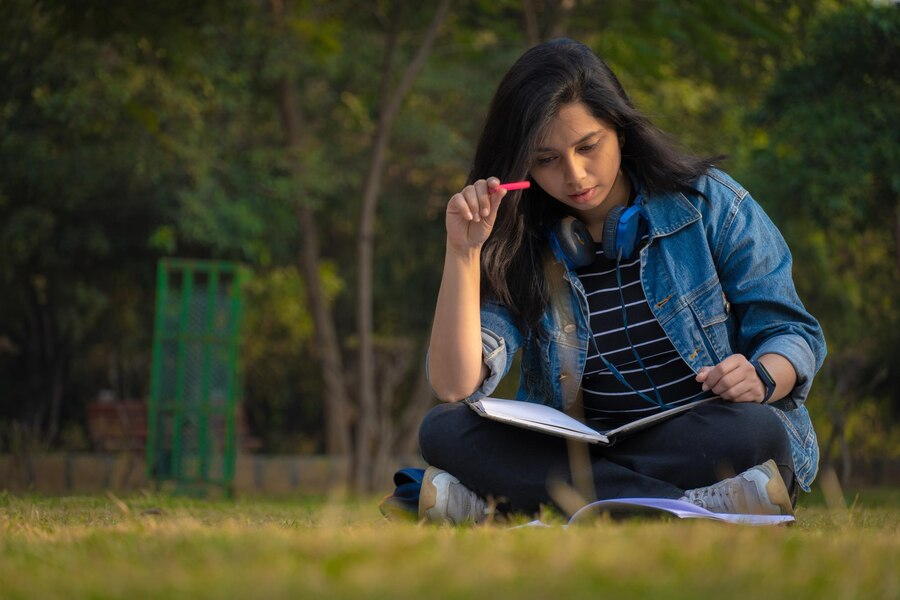

In [40]:
from IPython import display
display.Image("student.png")

### <span style='color:red '>3.1 Importing Graduate Admission Dataset and doing statistical analysis</span>

In [21]:
dataset1=pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")
dataset1.drop('Serial No.',axis=1, inplace=True)

In [22]:
dataset1.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [23]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [24]:
dataset1.describe().T

count       mean        std     min       25%     50%  \
GRE Score          500.0  316.47200  11.295148  290.00  308.0000  317.00   
TOEFL Score        500.0  107.19200   6.081868   92.00  103.0000  107.00   
University Rating  500.0    3.11400   1.143512    1.00    2.0000    3.00   
SOP                500.0    3.37400   0.991004    1.00    2.5000    3.50   
LOR                500.0    3.48400   0.925450    1.00    3.0000    3.50   
CGPA               500.0    8.57644   0.604813    6.80    8.1275    8.56   
Research           500.0    0.56000   0.496884    0.00    0.0000    1.00   
Chance of Admit    500.0    0.72174   0.141140    0.34    0.6300    0.72   

                      75%     max  
GRE Score          325.00  340.00  
TOEFL Score        112.00  120.00  
University Rating    4.00    5.00  
SOP                  4.00    5.00  
LOR                  4.00    5.00  
CGPA                 9.04    9.92  
Research             1.00    1.00  
Chance of Admit      0.82    0.97

In [25]:
dataset1.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### <span style='color:red '>3.2 Visualising Numerical data</span>

In [26]:
numerical_features=dataset1.columns
print(numerical_features)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


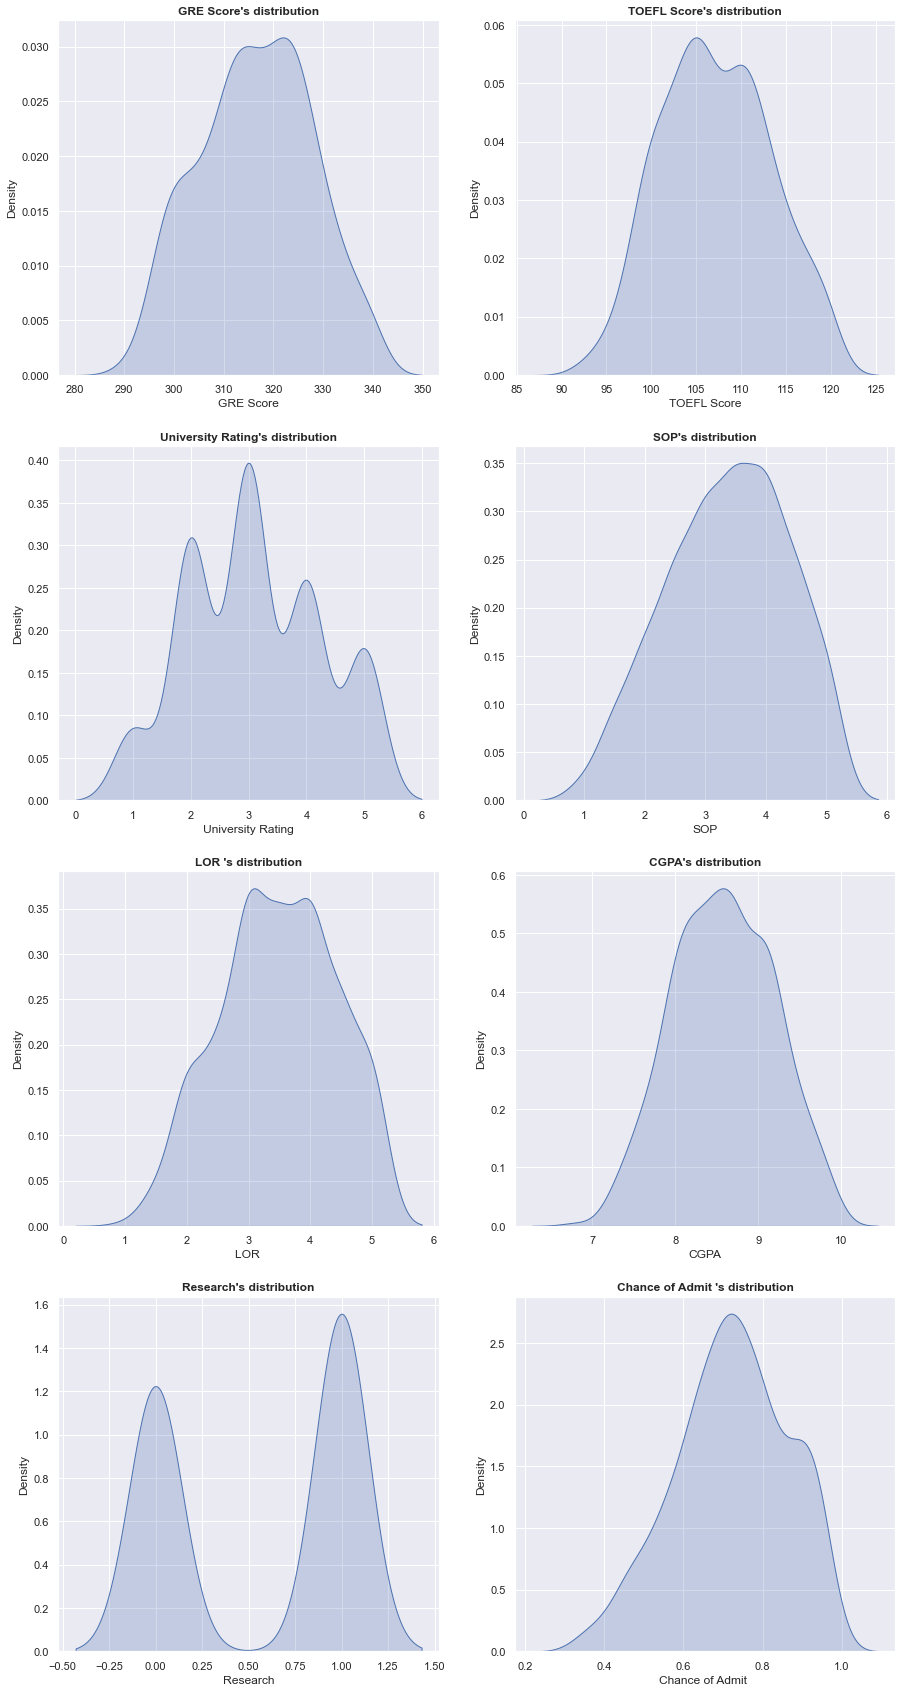

In [27]:
plt.figure(figsize=(15,30))
for i in enumerate(numerical_features):
    plt.subplot(4, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.kdeplot(data=dataset1, x=i[1], fill=True)
    plt.title("{}'s distribution".format(i[1]),fontweight="bold")

In [28]:
for feature in numerical_features:
    print("'{}' has '{}' No. of unique values".format(feature, dataset1[feature].nunique()))

'GRE Score' has '49' No. of unique values
'TOEFL Score' has '29' No. of unique values
'University Rating' has '5' No. of unique values
'SOP' has '9' No. of unique values
'LOR ' has '9' No. of unique values
'CGPA' has '184' No. of unique values
'Research' has '2' No. of unique values
'Chance of Admit ' has '61' No. of unique values


In [29]:
discrete_feature=[feature for feature in numerical_features if dataset1[feature].nunique()<10]
print(discrete_feature)

['University Rating', 'SOP', 'LOR ', 'Research']


In [33]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature]
print(continuous_features)

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']


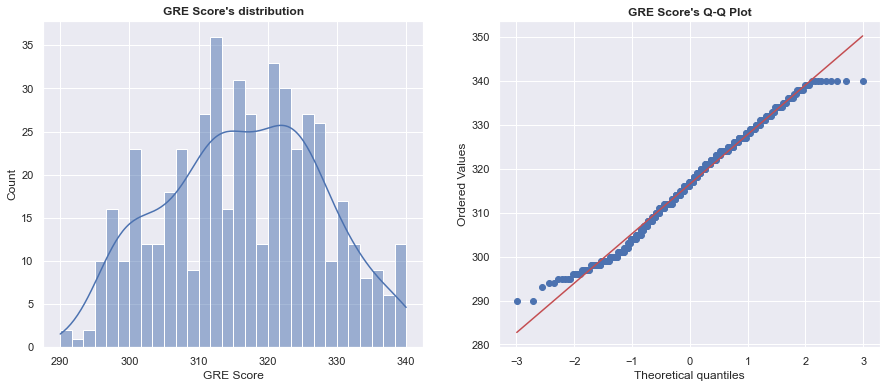

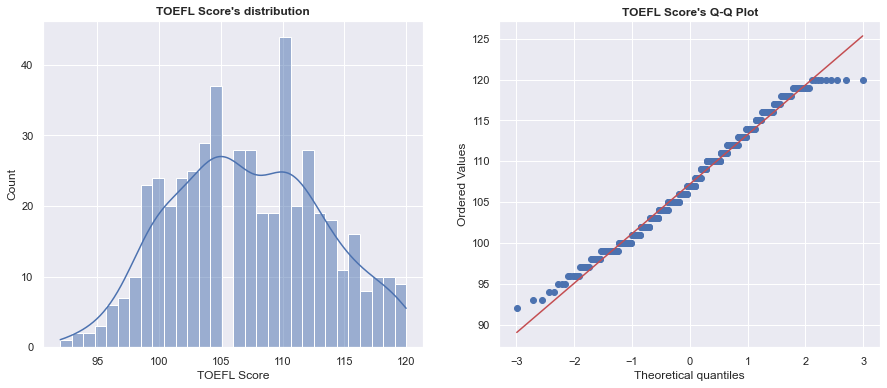

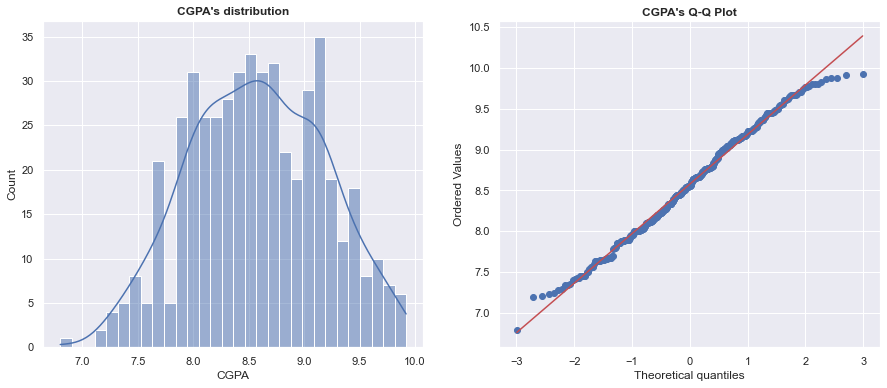

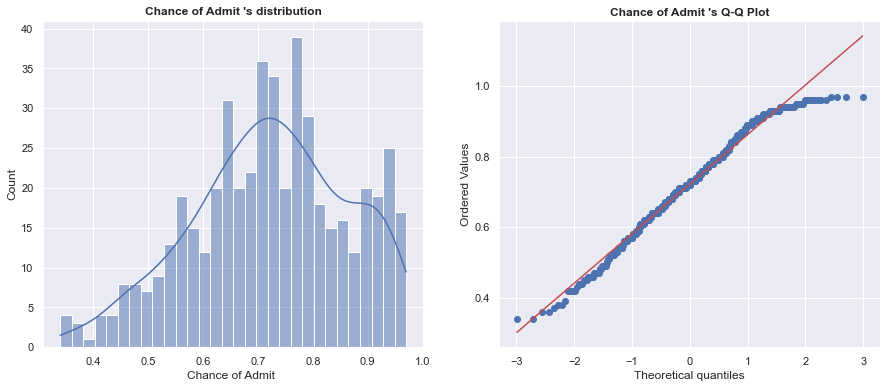

In [31]:
### Checking distribution of Continuous numerical features

for i in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=dataset1, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
    plt.subplot(122)
    stats.probplot(dataset1[i], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
    plt.show();

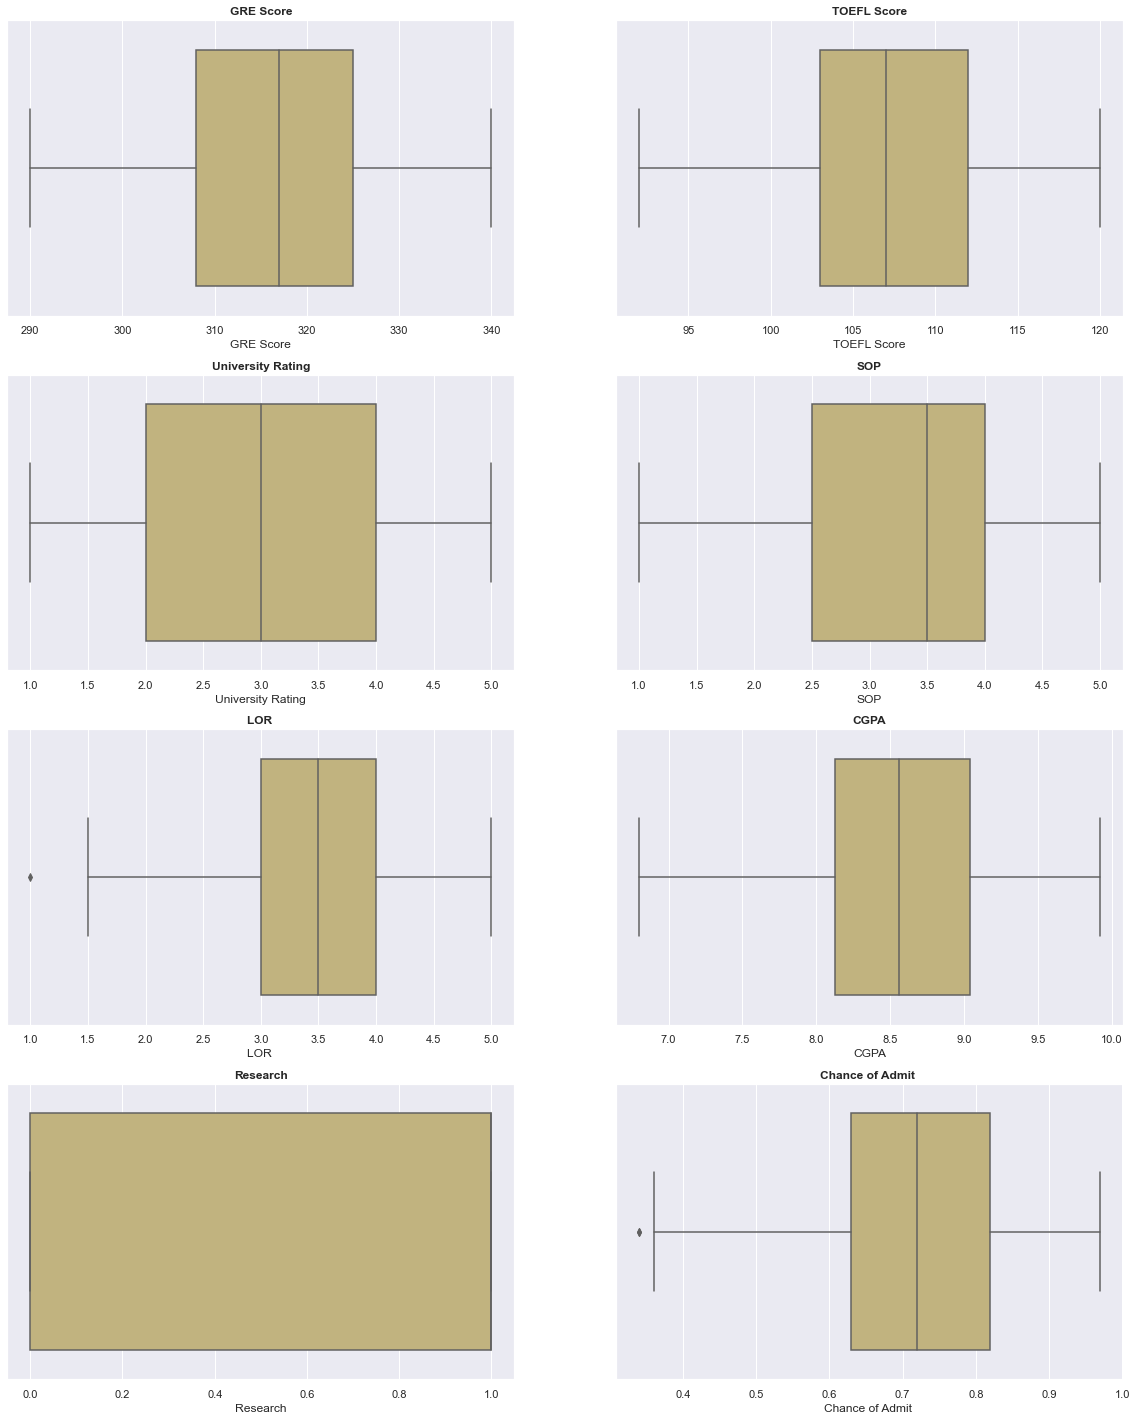

In [32]:
### Checking outliers in numerical features

plt.figure(figsize=(20,25))
for i in enumerate(numerical_features):
    plt.subplot(4, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset1, x=i[1], color='y')
    plt.title("{}".format(i[1]), fontweight="bold")

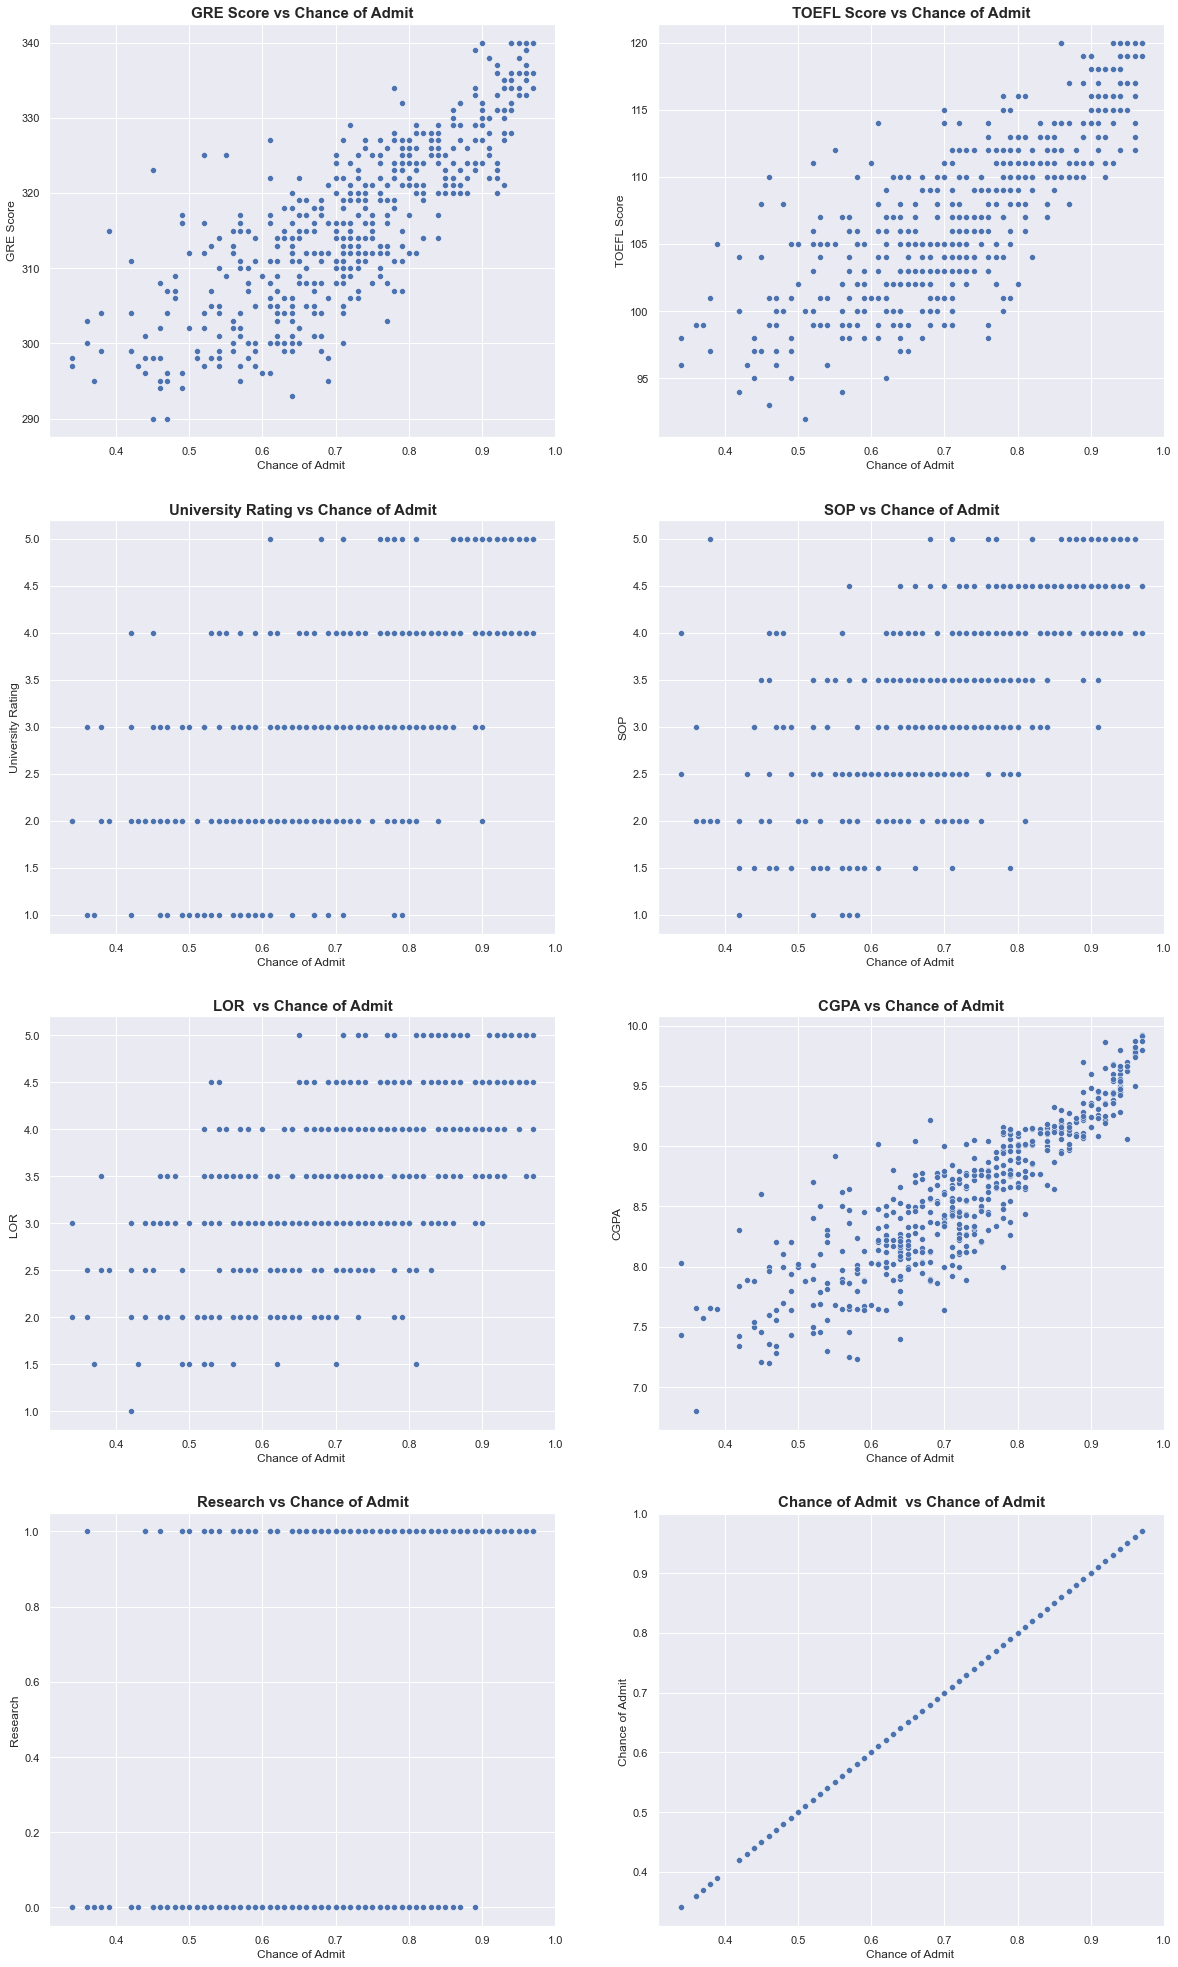

In [36]:
plt.figure(figsize=(20,35))
for i in enumerate(numerical_features):
    plt.subplot(4, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,8)})
    sns.scatterplot(data=dataset1, y=i[1], x='Chance of Admit ')
    plt.title("{} vs Chance of Admit".format(i[1]),fontsize=15, fontweight="bold")

In [34]:
dataset1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [233]:
corr1=round(dataset1.corr(),2)
corr1

GRE Score  TOEFL Score  University Rating   SOP  LOR   \
GRE Score               1.00         0.83               0.64  0.61  0.52   
TOEFL Score             0.83         1.00               0.65  0.64  0.54   
University Rating       0.64         0.65               1.00  0.73  0.61   
SOP                     0.61         0.64               0.73  1.00  0.66   
LOR                     0.52         0.54               0.61  0.66  1.00   
CGPA                    0.83         0.81               0.71  0.71  0.64   
Research                0.56         0.47               0.43  0.41  0.37   
Chance of Admit         0.81         0.79               0.69  0.68  0.65   

                   CGPA  Research  Chance of Admit   
GRE Score          0.83      0.56              0.81  
TOEFL Score        0.81      0.47              0.79  
University Rating  0.71      0.43              0.69  
SOP                0.71      0.41              0.68  
LOR                0.64      0.37              0.65  
CGPA               1.00      0.50              0.88  
Research           0.50      1.00              0.55  
Chance of Admit    0.88      0.55              1.00

<AxesSubplot:>

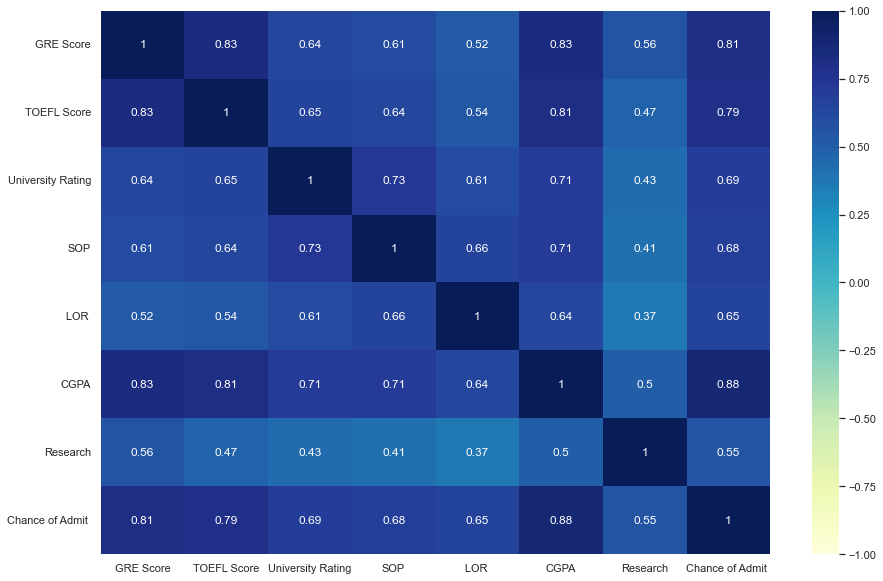

In [236]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr1, annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

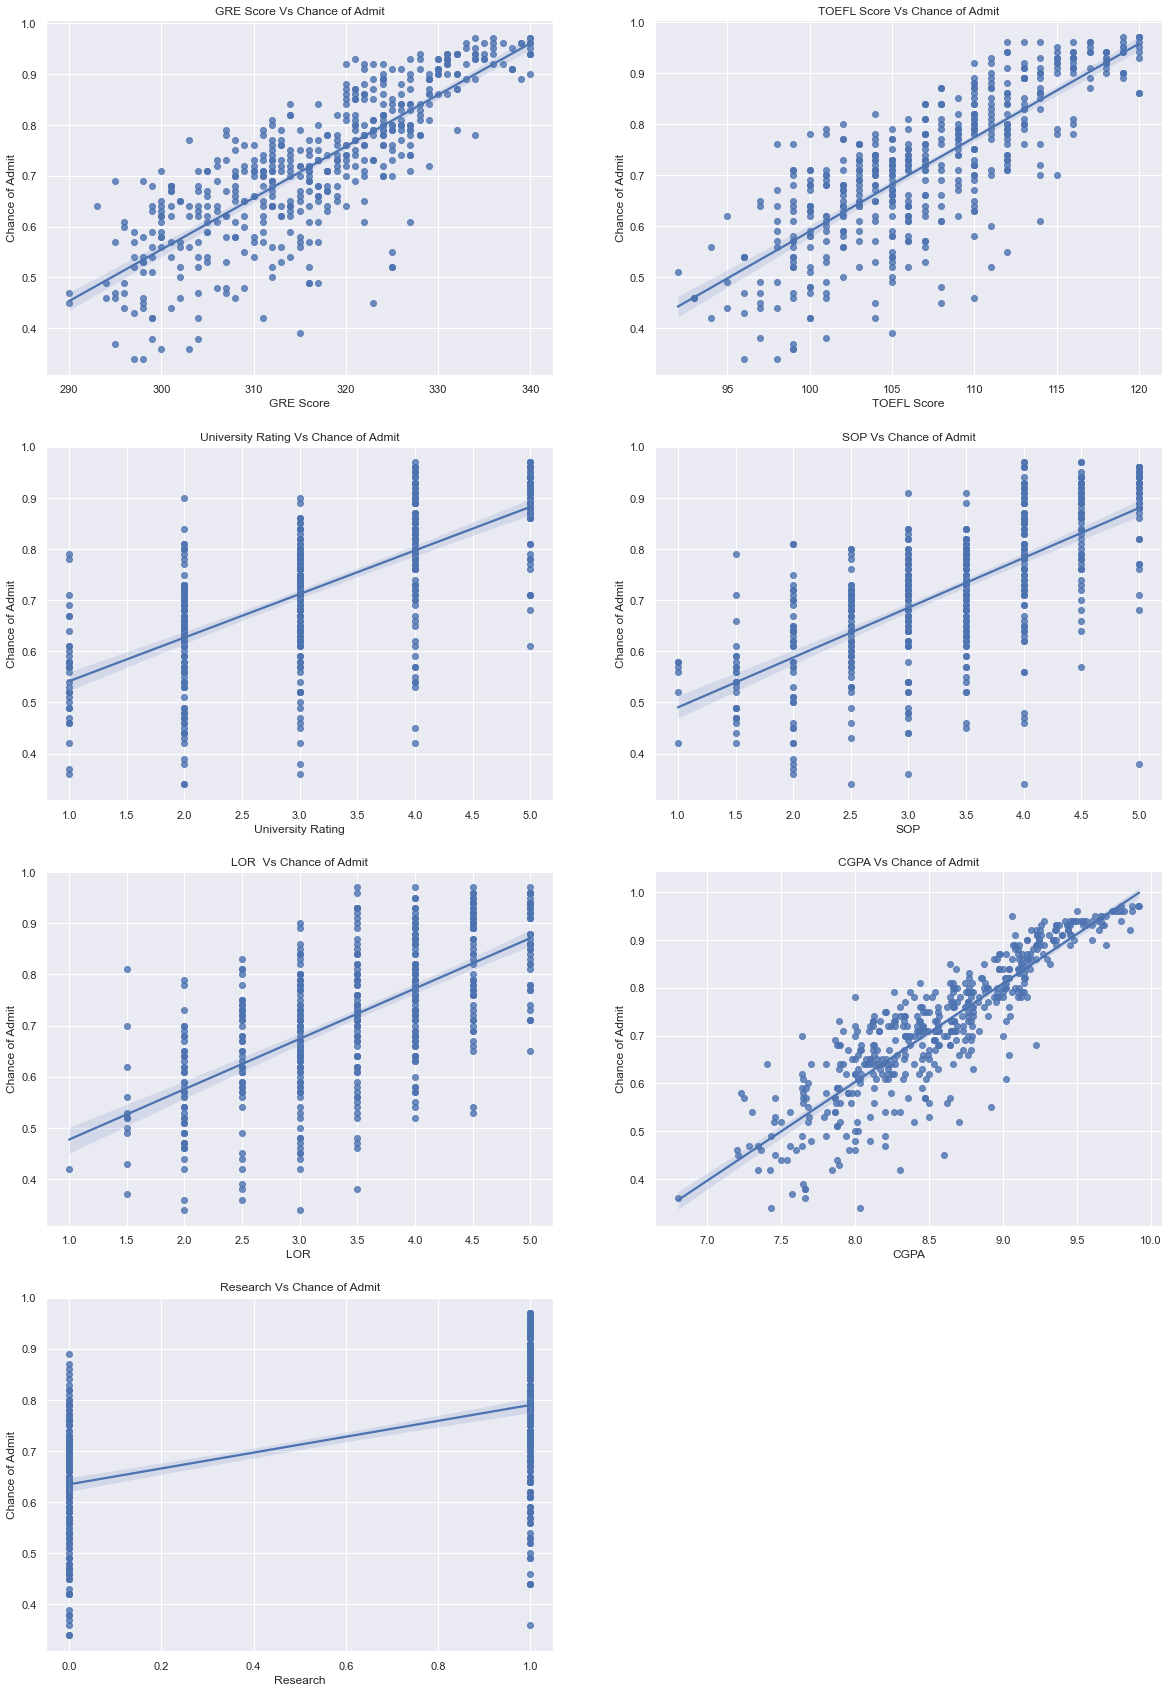

In [239]:
plt.figure(figsize=(20,30))
for i in enumerate([feature for feature in numerical_features if feature not in ['Chance of Admit ']]):
    plt.subplot(4, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.regplot(data=dataset1, x=i[1], y='Chance of Admit ')
    plt.xlabel(i[1])
    plt.ylabel("Chance of Admit")
    plt.title("{} Vs Chance of Admit".format(i[1]))

### <span style='color:red '>3.3 Splitting data into independent and dependent features</span>

In [203]:
X1=dataset1.iloc[:,:-1]
y1=dataset1.iloc[:,-1]
X1.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0

In [204]:
y1.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [205]:
### random state train test split will be same with all people using random_state=10
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=10)
X_train1.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
324        315          104                  3  3.0   2.5  8.33         0
252        318          100                  2  2.5   3.5  8.54         1
441        332          112                  1  1.5   3.0  8.66         1
427        310          101                  3  3.5   5.0  8.65         1
70         332          118                  5  5.0   5.0  9.64         1

In [206]:
y_train1.head()

324    0.67
252    0.71
441    0.79
427    0.71
70     0.94
Name: Chance of Admit , dtype: float64

In [207]:
X_test1.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
151        332          116                  5  5.0   5.0  9.28         1
424        325          114                  5  4.0   5.0  9.46         1
154        326          108                  3  3.0   3.5  8.89         0
190        324          111                  5  4.5   4.0  9.16         1
131        303          105                  5  5.0   4.5  8.65         0

In [208]:
y_test1.head()

151    0.94
424    0.91
154    0.80
190    0.90
131    0.77
Name: Chance of Admit , dtype: float64

In [209]:
### both will have same shape
X_train1.shape, y_train1.shape

((375, 7), (375,))

In [210]:
### both will have same shape
X_test1.shape, y_test1.shape

((125, 7), (125,))

### <span style='color:red '>3.4 Transforming data </span>

In [211]:
X_train1=scaler.fit_transform(X_train1)
X_train1

array([[-0.10006876, -0.50453716, -0.0560763 , ..., -1.00222248,
        -0.36783128, -1.13427746],
       [ 0.16173904, -1.16205736, -0.93226844, ...,  0.07005549,
        -0.0297116 ,  0.8816185 ],
       [ 1.38350874,  0.81050323, -1.80846058, ..., -0.46608349,
         0.16349965,  0.8816185 ],
       ...,
       [ 0.07446977, -0.17577707, -0.0560763 , ..., -0.46608349,
        -1.07627251,  0.8816185 ],
       [-1.40910772, -1.16205736, -0.0560763 , ..., -0.46608349,
         0.16349965,  0.8816185 ],
       [-0.27460729, -0.83329726, -0.0560763 , ..., -1.00222248,
         0.19570152, -1.13427746]])

In [212]:
X_test1=scaler.transform(X_test1)
X_test1

array([[ 1.38350874,  1.46802342,  1.69630798,  1.66146257,  1.67847246,
         1.16175776,  0.8816185 ],
       [ 0.77262389,  1.13926332,  1.69630798,  0.66378689,  1.67847246,
         1.45157463,  0.8816185 ],
       [ 0.85989315,  0.15298303, -0.0560763 , -0.3338888 ,  0.07005549,
         0.53382121, -1.13427746],
       [ 0.68535462,  0.64612318,  1.69630798,  1.16262473,  0.60619448,
         0.96854651,  0.8816185 ],
       [-1.14729993, -0.34015711,  1.69630798,  1.66146257,  1.14233347,
         0.14739871, -1.13427746],
       [ 0.33627757, -0.50453716, -0.0560763 , -0.3338888 ,  0.07005549,
         0.29230715,  0.8816185 ],
       [-0.36187655, -0.34015711, -0.93226844, -1.33156448, -1.00222248,
        -0.17462003, -1.13427746],
       [ 1.38350874,  0.15298303,  1.69630798,  1.16262473,  0.60619448,
         0.74313339,  0.8816185 ],
       [-0.62368434, -0.50453716, -0.93226844, -1.33156448, -1.00222248,
        -0.48053784, -1.13427746],
       [-0.36187655, -0.1757

### <span style='color:red '>3.5 Building SVR Model, training and performance of Model</span>

In [213]:
svr=SVR()
svr

SVR()

In [214]:
svr.fit(X_train1,y_train1)

SVR()

In [215]:
svr_pred=svr.predict(X_test1)
svr_pred

array([0.86448478, 0.86417389, 0.64993814, 0.85127578, 0.70546036,
       0.7574019 , 0.64562856, 0.8374946 , 0.60540491, 0.7499413 ,
       0.87245167, 0.80905978, 0.8501926 , 0.67828992, 0.79563367,
       0.73813638, 0.70599962, 0.74942901, 0.74397623, 0.62461368,
       0.74524207, 0.62023823, 0.59939887, 0.86498548, 0.47403454,
       0.86577212, 0.73739421, 0.5349166 , 0.66114659, 0.6681512 ,
       0.88063063, 0.75792351, 0.59757618, 0.659533  , 0.72195655,
       0.86222102, 0.81603033, 0.66700444, 0.66986721, 0.70308992,
       0.86541166, 0.59529725, 0.69816638, 0.87297663, 0.85464852,
       0.50589332, 0.56266899, 0.65426092, 0.77984391, 0.72964663,
       0.79144637, 0.68053493, 0.54289505, 0.60234504, 0.65093636,
       0.79311027, 0.83658814, 0.61545878, 0.68815676, 0.86796428,
       0.61411511, 0.82414663, 0.73731365, 0.50901921, 0.83202811,
       0.5044696 , 0.70643466, 0.71803499, 0.52797734, 0.69684074,
       0.89743609, 0.55063192, 0.57081914, 0.73056104, 0.69386

In [218]:
svr_r2_score=r2_score(y_test1, svr_pred)
print("Our Support Vector Regressor model has {} % accuracy".format(round(svr_r2_score*100,3)))

Our Support Vector Regressor model has 75.701 % accuracy


In [219]:
adjusted_r2_score=1-((1-svr_r2_score)*(len(y_test1)-1)/(len(y_test1)-X_test1.shape[1]-1))
print("Adjusted R square accuracy is {} % ".format(round(adjusted_r2_score*100,3)))

Adjusted R square accuracy is 74.247 % 
